# Exploratory Data Analysis
## Numbeo Quality of Life Index by Country 2023 Mid-Year
Data source: https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2023-mid \
Indices explained: https://www.numbeo.com/quality-of-life/indices_explained.jsp

# Exploring the Quality of Life Index

In [1]:
# read the file 
import pandas as pd 
df = pd.read_csv("numbeo_quality_of_life_index_by_country_2023_12_28.csv")

In [2]:
# information of df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   rank                            84 non-null     int64  
 1   country                         84 non-null     object 
 2   quality_of_life_index           84 non-null     float64
 3   purchasing_power_index          84 non-null     float64
 4   safety_index                    84 non-null     float64
 5   health_care_index               84 non-null     float64
 6   cost_of_living_index            84 non-null     float64
 7   property_price_to_income_ratio  84 non-null     float64
 8   traffic_commute_time_index      84 non-null     float64
 9   pollution_index                 84 non-null     float64
 10  climate_index                   84 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 7.3+ KB


In [3]:
# show the first 5 rows 
df[['rank', 'country', 'quality_of_life_index']].head()

rank      country  quality_of_life_index
0     1   Luxembourg                  200.1
1     2  Netherlands                  200.1
2     3      Iceland                  191.1
3     4      Denmark                  190.6
4     5      Finland                  188.1

In [4]:
# show the last 5 rows 
df[['rank', 'country', 'quality_of_life_index']].tail() 

rank     country  quality_of_life_index
79    80        Iran                   77.6
80    81   Sri Lanka                   76.5
81    82   Venezuela                   74.4
82    83  Bangladesh                   69.5
83    84     Nigeria                   49.5

In [5]:
# looking for a specific country 
## df[['rank', 'country', 'quality_of_life_index']][df['country'] == "Country Name"]
## I am using Indonesia the country where I live now as an example 
df[['rank', 'country', 'quality_of_life_index']][df['country'] == "Indonesia"]

rank    country  quality_of_life_index
73    74  Indonesia                   92.0

In [6]:
# In case your chosen country does not exist in the dataset, it will show a null result. 
df[['rank', 'country', 'quality_of_life_index']][df['country'] == "Saturnus"] 

Empty DataFrame
Columns: [rank, country, quality_of_life_index]
Index: []

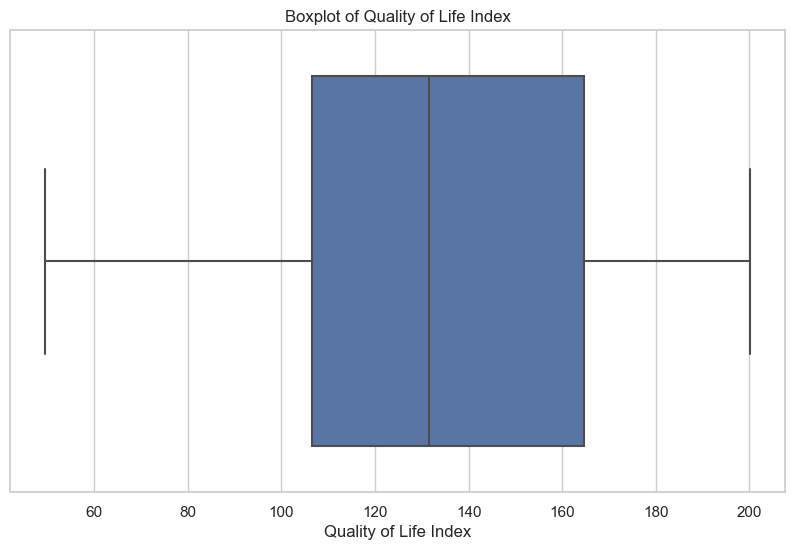

In [7]:
# Showing boxplot of the quality of life index and the data distribution 
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set(style = "whitegrid") 
plt.figure(figsize = (10, 6))
sns.boxplot(x = df['quality_of_life_index'])
plt.xlabel('Quality of Life Index')
plt.title('Boxplot of Quality of Life Index')
plt.show()

In [8]:
# Showing the statistical measurement to tell us the data distribution 
df['quality_of_life_index'].describe()

count     84.000000
mean     134.266667
std       35.483793
min       49.500000
25%      106.475000
50%      131.500000
75%      164.575000
max      200.100000
Name: quality_of_life_index, dtype: float64

In [9]:
# In case we want to know which country has a higher quality of life index than the average (the first 5 rows) 
df[['rank', 'country', 'quality_of_life_index']][df['quality_of_life_index'] > 134.266667].tail() 

rank       country  quality_of_life_index
36    37         Italy                  140.3
37    38        Poland                  139.6
38    39   South Korea                  138.1
39    40  South Africa                  136.9
40    41       Uruguay                  136.2

In [10]:
# In case we want to know which country has a lower quality of life index than the average (the first 5 rows) 
df[['rank', 'country', 'quality_of_life_index']][df['quality_of_life_index'] < 134.266667].head() 

rank   country  quality_of_life_index
41    42   Hungary                  131.6
42    43  Bulgaria                  131.4
43    44   Romania                  129.9
44    45    Kuwait                  129.7
45    46    Greece                  128.9

# Exploring the Purchasing Power Index

In [11]:
# show the first 5 rows 
df[['rank', 'country', 'quality_of_life_index', 'purchasing_power_index']].sort_values(by = 'purchasing_power_index', ascending = False).head()

rank               country  quality_of_life_index  purchasing_power_index
0      1            Luxembourg                  200.1                   133.2
18    19                 Qatar                  166.6                   120.2
14    15  United Arab Emirates                  173.8                   118.0
15    16         United States                  173.0                   117.7
5      6           Switzerland                  185.8                   110.8

In [12]:
# show the last 5 rows 
df[['rank', 'country', 'quality_of_life_index', 'purchasing_power_index']].sort_values(by = 'purchasing_power_index', ascending = False).tail() 

rank    country  quality_of_life_index  purchasing_power_index
76    77    Lebanon                   82.4                    19.4
75    76      Egypt                   88.6                    17.4
80    81  Sri Lanka                   76.5                    14.6
81    82  Venezuela                   74.4                    11.3
83    84    Nigeria                   49.5                     9.4

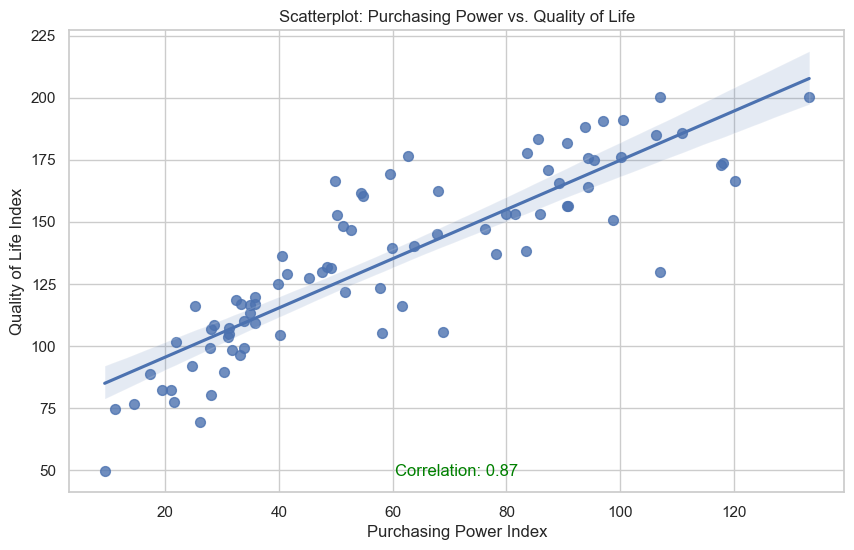

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'purchasing_power_index', y = 'quality_of_life_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['quality_of_life_index'], df['purchasing_power_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Purchasing Power Index')
plt.ylabel('Quality of Life Index')
plt.title('Scatterplot: Purchasing Power vs. Quality of Life')

# Show the plot
plt.show()

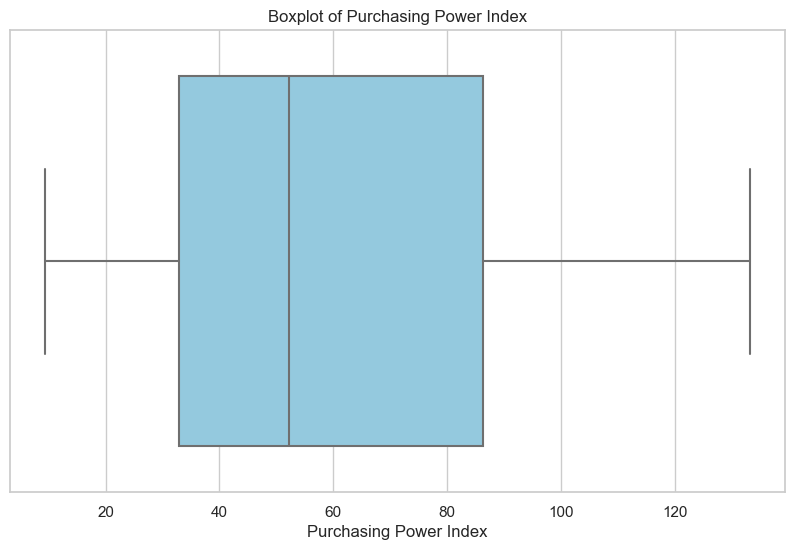

In [14]:
# Showing boxplot of the purchasing power index and the data distribution 
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set(style = "whitegrid") 
boxplot_color = 'skyblue'
plt.figure(figsize = (10, 6))
sns.boxplot(x = df['purchasing_power_index'], color = boxplot_color)
plt.xlabel('Purchasing Power Index')
plt.title('Boxplot of Purchasing Power Index')
plt.show()

In [15]:
# Showing the statistical measurement to tell us the data distribution 
df['purchasing_power_index'].describe()

count     84.000000
mean      59.138095
std       31.055352
min        9.400000
25%       32.950000
50%       52.150000
75%       86.250000
max      133.200000
Name: purchasing_power_index, dtype: float64

# Exploring the Safety Index

In [16]:
# show the first 5 rows 
df[['rank', 'country', 'quality_of_life_index', 'purchasing_power_index', 'safety_index']].sort_values(by = 'safety_index', ascending = False).head()

rank               country  quality_of_life_index  purchasing_power_index  \
18    19                 Qatar                  166.6                   120.2   
14    15  United Arab Emirates                  173.8                   118.0   
35    36                Taiwan                  144.9                    67.8   
6      7                  Oman                  184.8                   106.2   
63    64     Hong Kong (China)                  105.5                    68.8   

    safety_index  
18          85.7  
14          85.4  
35          83.9  
6           80.4  
63          78.3

In [17]:
# show the first 5 rows 
df[['rank', 'country', 'quality_of_life_index', 'purchasing_power_index', 'safety_index']].sort_values(by = 'safety_index', ascending = False).tail()

rank       country  quality_of_life_index  purchasing_power_index  \
83    84       Nigeria                   49.5                     9.4   
62    63        Brazil                  106.8                    28.0   
78    79          Peru                   80.3                    28.0   
39    40  South Africa                  136.9                    78.1   
81    82     Venezuela                   74.4                    11.3   

    safety_index  
83          34.2  
62          33.9  
78          32.5  
39          24.5  
81          17.9

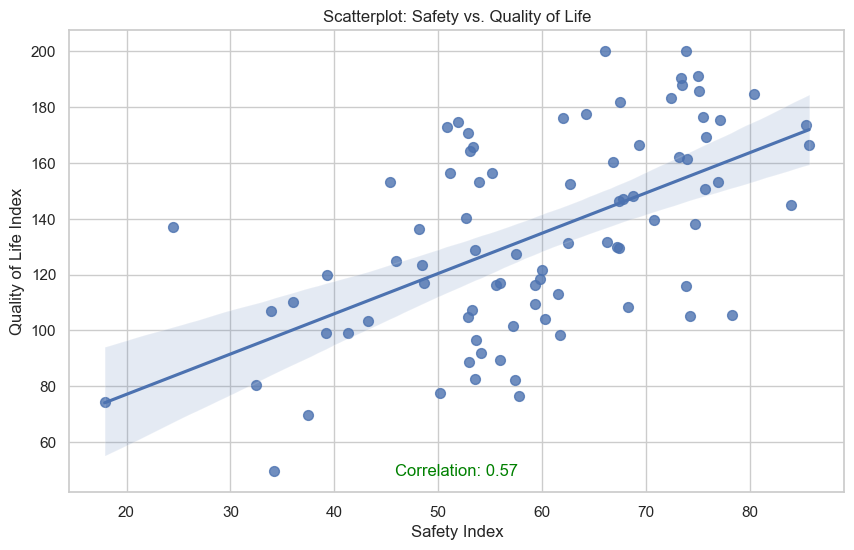

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'safety_index', y = 'quality_of_life_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['quality_of_life_index'], df['safety_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Safety Index')
plt.ylabel('Quality of Life Index')
plt.title('Scatterplot: Safety vs. Quality of Life')

# Show the plot
plt.show() 

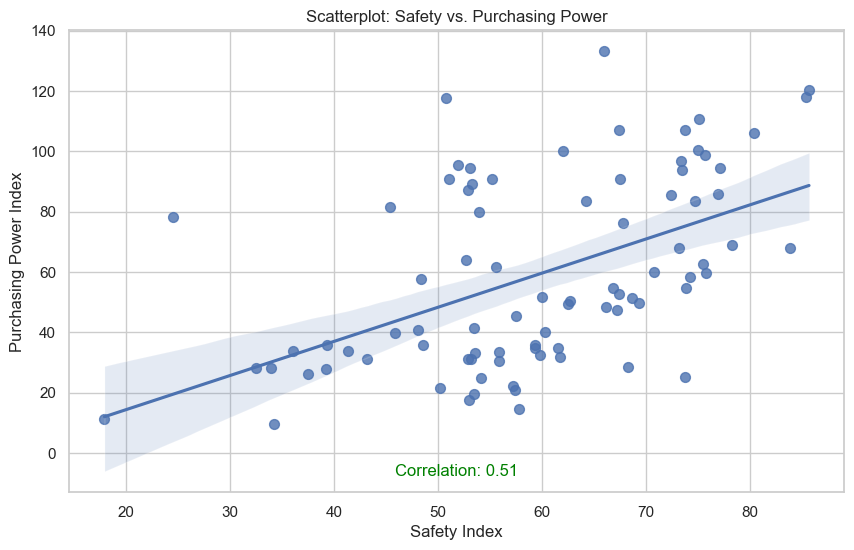

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'safety_index', y = 'purchasing_power_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['purchasing_power_index'], df['safety_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Safety Index')
plt.ylabel('Purchasing Power Index')
plt.title('Scatterplot: Safety vs. Purchasing Power')

# Show the plot
plt.show()

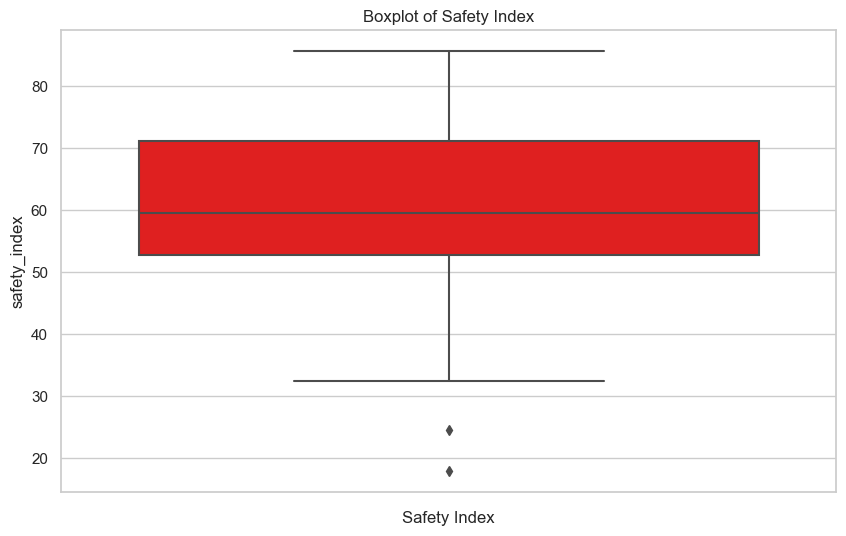

In [20]:
# Showing boxplot of the safety index and the data distribution 
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set(style = "whitegrid") 
boxplot_color = 'red'
plt.figure(figsize = (10, 6))
sns.boxplot(y = df['safety_index'], color = boxplot_color)
plt.xlabel('Safety Index')
plt.title('Boxplot of Safety Index')
plt.show()

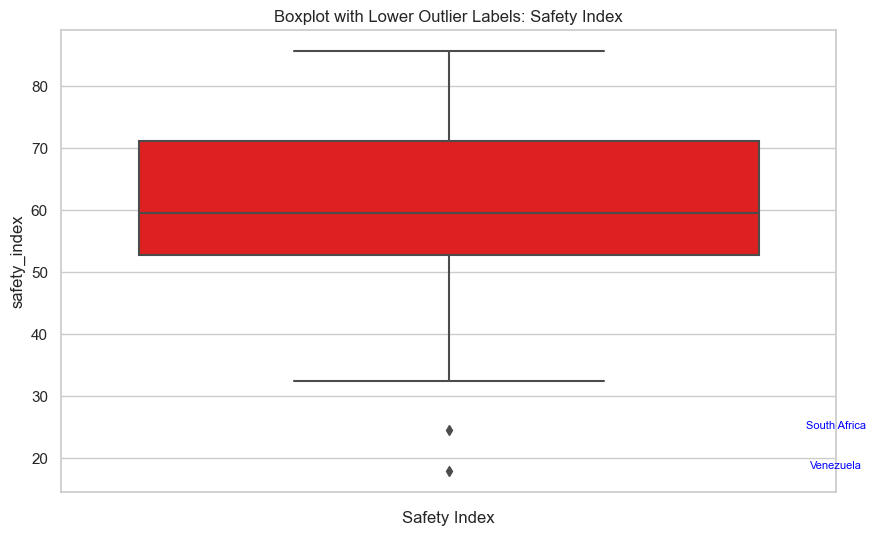

In [21]:
# Showing boxplot with outlier label
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
Q1 = df['safety_index'].quantile(0.25)
Q3 = df['safety_index'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
lower_outliers = df[df['safety_index'] < lower_bound]

plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(y=df['safety_index'], color='red')
for _, row in lower_outliers.iterrows():
    plt.text(0.5, row['safety_index'], row['country'],
             ha='center', va='bottom', fontsize=8, color='blue')
plt.xlabel('Safety Index')
plt.title('Boxplot with Lower Outlier Labels: Safety Index')
plt.show()

In [22]:
# Showing the statistical measurement to tell us the data distribution 
df['safety_index'].describe()

count    84.000000
mean     59.601190
std      14.034197
min      17.900000
25%      52.850000
50%      59.550000
75%      71.200000
max      85.700000
Name: safety_index, dtype: float64

# Exploring the Health Care Index

In [23]:
# show the first 5 rows 
df[['rank', 'country', 'quality_of_life_index', 'purchasing_power_index', 'safety_index',
   'health_care_index']].sort_values(by = 'health_care_index', ascending = False).head()

rank      country  quality_of_life_index  purchasing_power_index  \
35    36       Taiwan                  144.9                    67.8   
38    39  South Korea                  138.1                    83.5   
12    13        Japan                  175.5                    94.3   
28    29       France                  153.2                    81.5   
1      2  Netherlands                  200.1                   106.9   

    safety_index  health_care_index  
35          83.9               85.9  
38          74.7               83.0  
12          77.1               79.6  
28          45.4               78.8  
1           73.8               78.6

In [24]:
# show the first 5 rows 
df[['rank', 'country', 'quality_of_life_index', 'purchasing_power_index', 'safety_index',
   'health_care_index']].sort_values(by = 'health_care_index', ascending = False).tail()

rank     country  quality_of_life_index  purchasing_power_index  \
52    53     Belarus                  117.0                    35.9   
60    61  Azerbaijan                  108.5                    28.6   
65    66     Morocco                  104.7                    31.2   
82    83  Bangladesh                   69.5                    26.2   
81    82   Venezuela                   74.4                    11.3   

    safety_index  health_care_index  
52          48.6               47.7  
60          68.3               47.5  
65          52.9               45.4  
82          37.5               42.0  
81          17.9               39.2

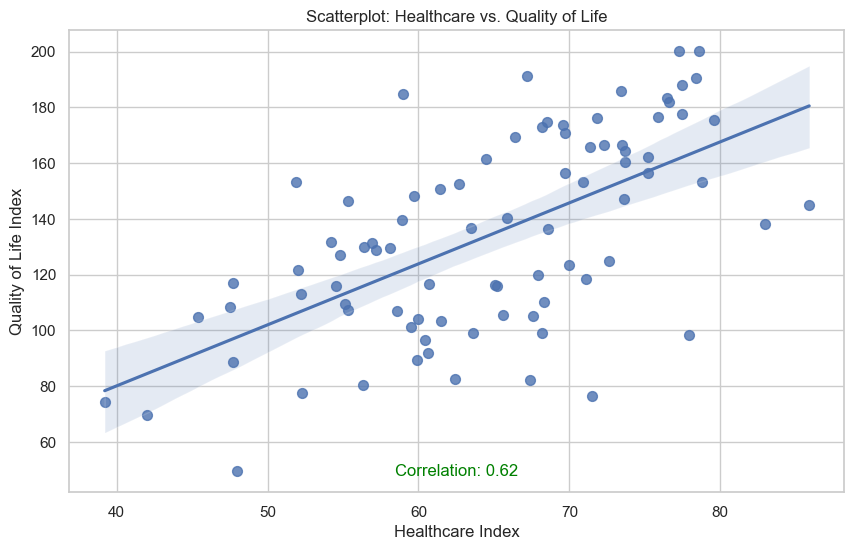

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'health_care_index', y = 'quality_of_life_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['quality_of_life_index'], df['health_care_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Healthcare Index')
plt.ylabel('Quality of Life Index')
plt.title('Scatterplot: Healthcare vs. Quality of Life')

# Show the plot
plt.show()

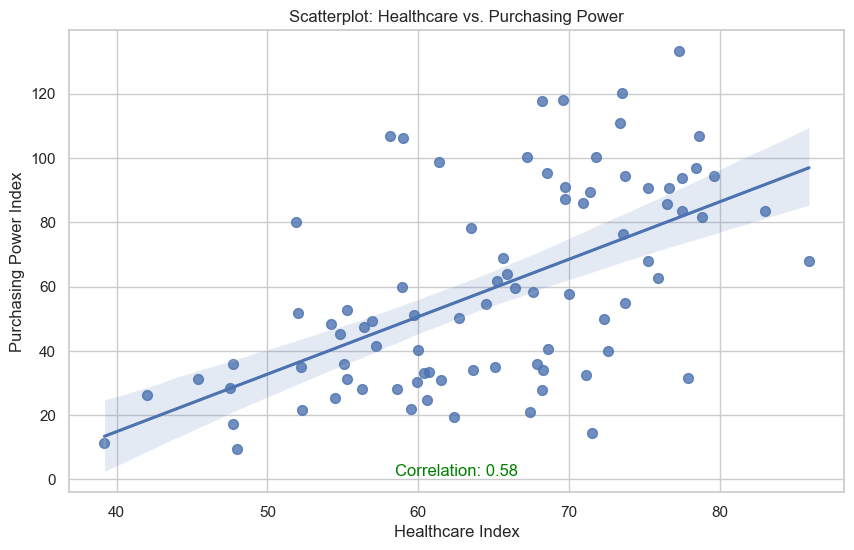

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'health_care_index', y = 'purchasing_power_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['purchasing_power_index'], df['health_care_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Healthcare Index')
plt.ylabel('Purchasing Power Index')
plt.title('Scatterplot: Healthcare vs. Purchasing Power')

# Show the plot
plt.show()

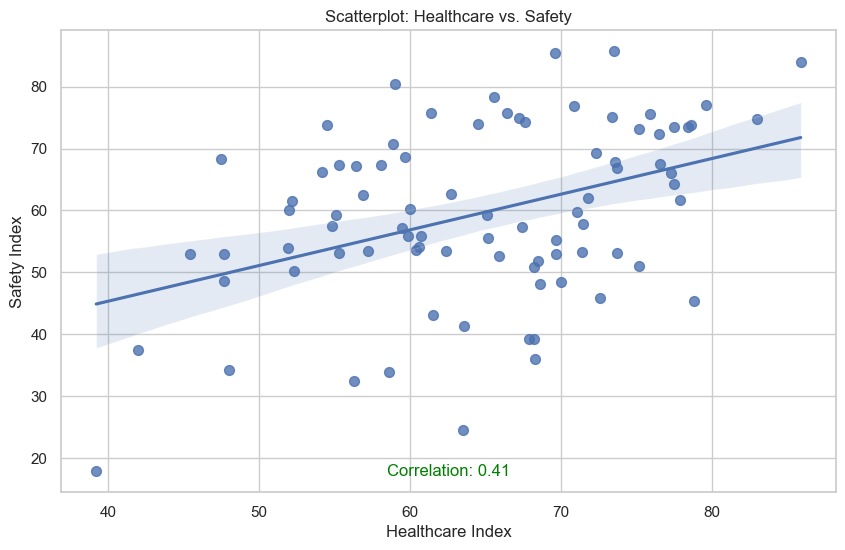

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'health_care_index', y = 'safety_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['safety_index'], df['health_care_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Healthcare Index')
plt.ylabel('Safety Index')
plt.title('Scatterplot: Healthcare vs. Safety')

# Show the plot
plt.show()

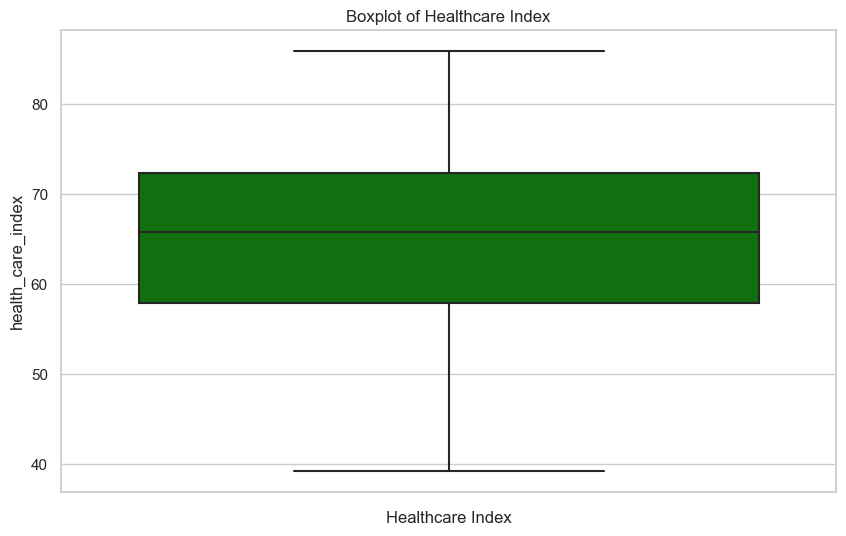

In [28]:
# Showing boxplot of the healthcare index and the data distribution 
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set(style = "whitegrid") 
boxplot_color = 'green'
plt.figure(figsize = (10, 6))
sns.boxplot(y = df['health_care_index'], color = boxplot_color)
plt.xlabel('Healthcare Index')
plt.title('Boxplot of Healthcare Index')
plt.show()

In [29]:
# Showing the statistical measurement to tell us the data distribution 
df['health_care_index'].describe()

count    84.000000
mean     64.754762
std      10.004678
min      39.200000
25%      57.875000
50%      65.750000
75%      72.375000
max      85.900000
Name: health_care_index, dtype: float64

# Exploring the Cost of Living Index

In [30]:
# show the first 5 rows 
df[['rank', 'country', 'quality_of_life_index', 'purchasing_power_index', 'safety_index',
   'health_care_index', 'cost_of_living_index']].sort_values(by = 'cost_of_living_index', ascending = True).head()

rank     country  quality_of_life_index  purchasing_power_index  \
68    69    Pakistan                  101.4                    22.0   
75    76       Egypt                   88.6                    17.4   
55    56       India                  116.1                    61.7   
83    84     Nigeria                   49.5                     9.4   
82    83  Bangladesh                   69.5                    26.2   

    safety_index  health_care_index  cost_of_living_index  
68          57.2               59.5                  17.6  
75          53.0               47.7                  21.7  
55          55.6               65.2                  22.9  
83          34.2               48.0                  23.2  
82          37.5               42.0                  26.2

In [31]:
# show the first 5 rows 
df[['rank', 'country', 'quality_of_life_index', 'purchasing_power_index', 'safety_index',
   'health_care_index', 'cost_of_living_index']].sort_values(by = 'cost_of_living_index', ascending = True).tail()

rank      country  quality_of_life_index  purchasing_power_index  \
3      4      Denmark                  190.6                    96.9   
8      9       Norway                  181.8                    90.7   
29    30    Singapore                  153.2                    85.9   
2      3      Iceland                  191.1                   100.4   
5      6  Switzerland                  185.8                   110.8   

    safety_index  health_care_index  cost_of_living_index  
3           73.4               78.4                  79.2  
8           67.5               76.6                  82.2  
29          76.9               70.9                  85.9  
2           75.0               67.2                  87.7  
5           75.1               73.4                 117.3

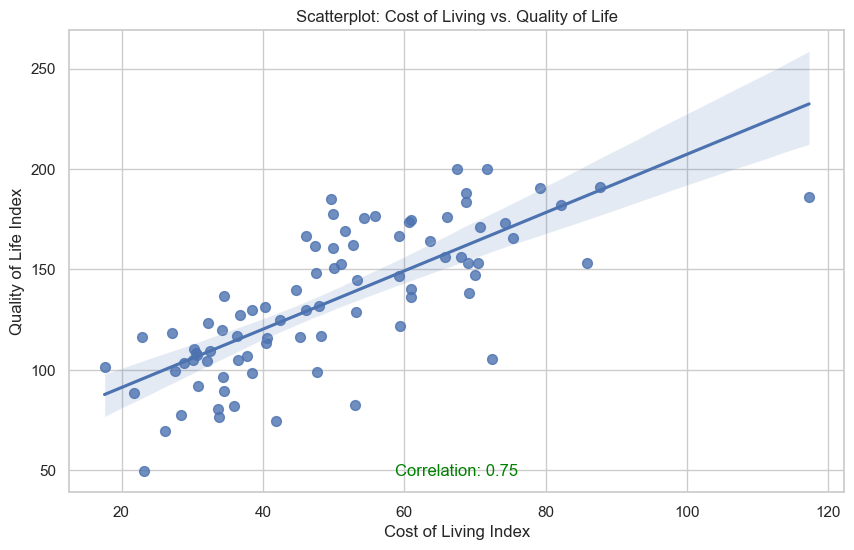

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'cost_of_living_index', y = 'quality_of_life_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['quality_of_life_index'], df['cost_of_living_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Cost of Living Index')
plt.ylabel('Quality of Life Index')
plt.title('Scatterplot: Cost of Living vs. Quality of Life')

# Show the plot
plt.show()

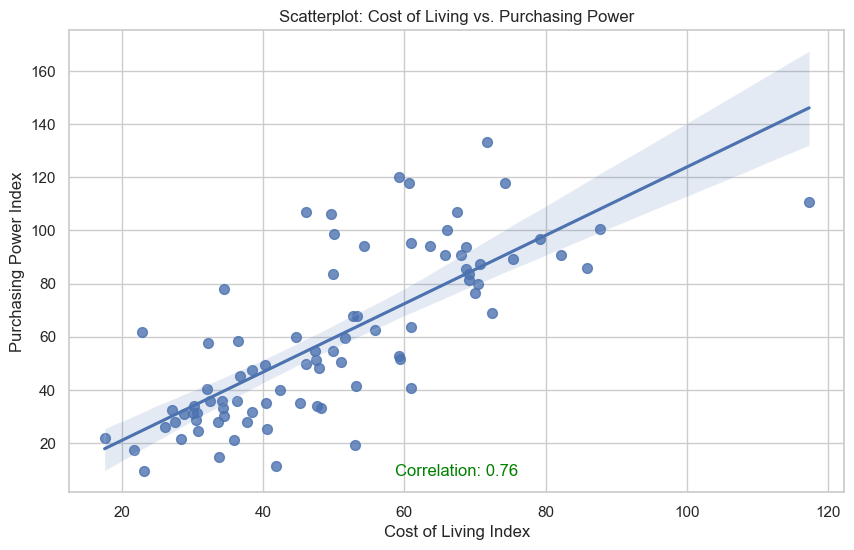

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'cost_of_living_index', y = 'purchasing_power_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['purchasing_power_index'], df['cost_of_living_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Cost of Living Index')
plt.ylabel('Purchasing Power Index')
plt.title('Scatterplot: Cost of Living vs. Purchasing Power')

# Show the plot
plt.show()

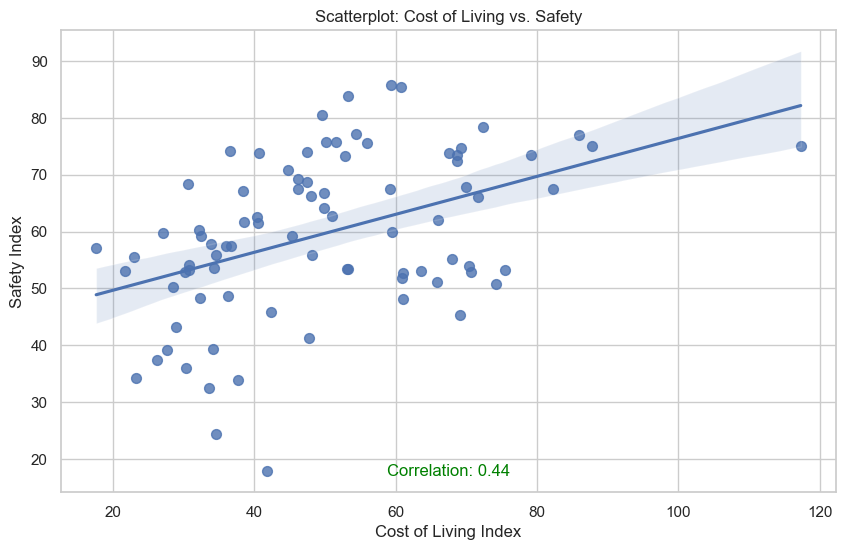

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'cost_of_living_index', y = 'safety_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['safety_index'], df['cost_of_living_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Cost of Living Index')
plt.ylabel('Safety Index')
plt.title('Scatterplot: Cost of Living vs. Safety')

# Show the plot
plt.show()

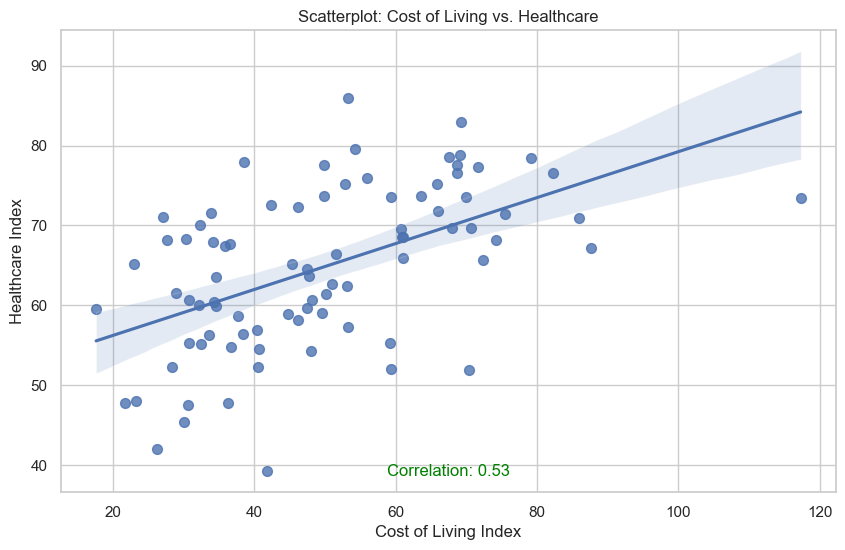

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'cost_of_living_index', y = 'health_care_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['health_care_index'], df['cost_of_living_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Cost of Living Index')
plt.ylabel('Healthcare Index')
plt.title('Scatterplot: Cost of Living vs. Healthcare')

# Show the plot
plt.show()

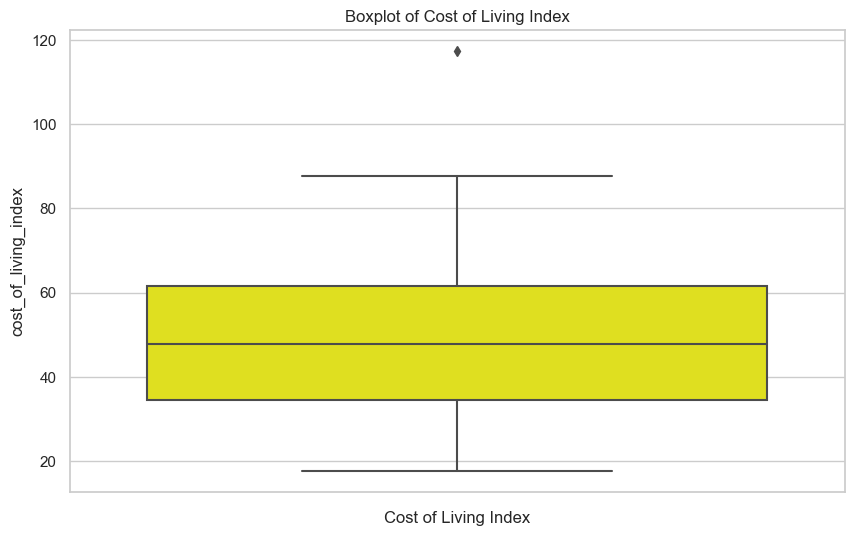

In [36]:
# Showing boxplot of the cost of living index and the data distribution 
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set(style = "whitegrid") 
boxplot_color = 'yellow'
plt.figure(figsize = (10, 6))
sns.boxplot(y = df['cost_of_living_index'], color = boxplot_color)
plt.xlabel('Cost of Living Index')
plt.title('Boxplot of Cost of Living Index')
plt.show()

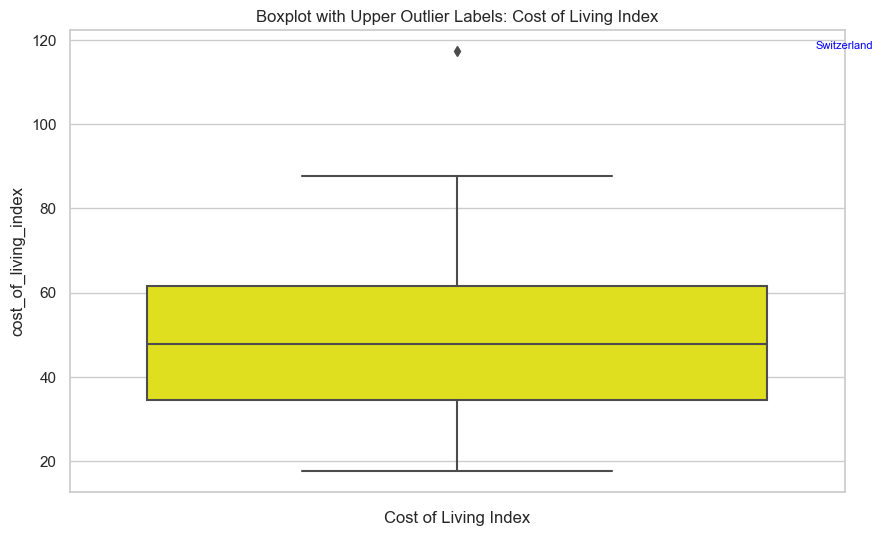

In [37]:
# Showing boxplot with outlier label
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
Q1 = df['cost_of_living_index'].quantile(0.25)
Q3 = df['cost_of_living_index'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
upper_outliers = df[df['cost_of_living_index'] > upper_bound]

plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(y=df['cost_of_living_index'], color='yellow')
for _, row in upper_outliers.iterrows():
    plt.text(0.5, row['cost_of_living_index'], row['country'],
             ha='center', va='bottom', fontsize=8, color='blue')
plt.xlabel('Cost of Living Index')
plt.title('Boxplot with Upper Outlier Labels: Cost of Living Index')
plt.show()

In [38]:
# Showing the statistical measurement to tell us the data distribution 
df['cost_of_living_index'].describe()

count     84.000000
mean      49.695238
std       18.359889
min       17.600000
25%       34.450000
50%       47.850000
75%       61.650000
max      117.300000
Name: cost_of_living_index, dtype: float64

# Exploring the Property Price to Income Ratio

In [39]:
# show the first 5 rows 
df[['rank', 'country', 'quality_of_life_index', 'purchasing_power_index', 'safety_index',
    'health_care_index', 'cost_of_living_index',
    'property_price_to_income_ratio']].sort_values(by = 'property_price_to_income_ratio', ascending = True).head()

rank               country  quality_of_life_index  purchasing_power_index  \
31    32          Saudi Arabia                  150.7                    98.7   
6      7                  Oman                  184.8                   106.2   
14    15  United Arab Emirates                  173.8                   118.0   
39    40          South Africa                  136.9                    78.1   
15    16         United States                  173.0                   117.7   

    safety_index  health_care_index  cost_of_living_index  \
31          75.7               61.4                  50.1   
6           80.4               59.0                  49.6   
14          85.4               69.6                  60.7   
39          24.5               63.5                  34.5   
15          50.8               68.2                  74.2   

    property_price_to_income_ratio  
31                             2.9  
6                              3.2  
14                             3.3  
39                             3.3  
15                             4.2

In [40]:
# show the first 5 rows 
df[['rank', 'country', 'quality_of_life_index', 'purchasing_power_index', 'safety_index',
    'health_care_index', 'cost_of_living_index',
    'property_price_to_income_ratio']].sort_values(by = 'property_price_to_income_ratio', ascending = True).tail()

rank            country  quality_of_life_index  purchasing_power_index  \
71    72           Thailand                   98.5                    31.7   
77    78        Philippines                   82.1                    21.0   
64    65              China                  105.1                    58.2   
80    81          Sri Lanka                   76.5                    14.6   
63    64  Hong Kong (China)                  105.5                    68.8   

    safety_index  health_care_index  cost_of_living_index  \
71          61.7               77.9                  38.5   
77          57.4               67.4                  35.9   
64          74.2               67.6                  36.5   
80          57.8               71.5                  33.8   
63          78.3               65.6                  72.4   

    property_price_to_income_ratio  
71                            25.8  
77                            31.0  
64                            33.0  
80                            35.3  
63                            42.1

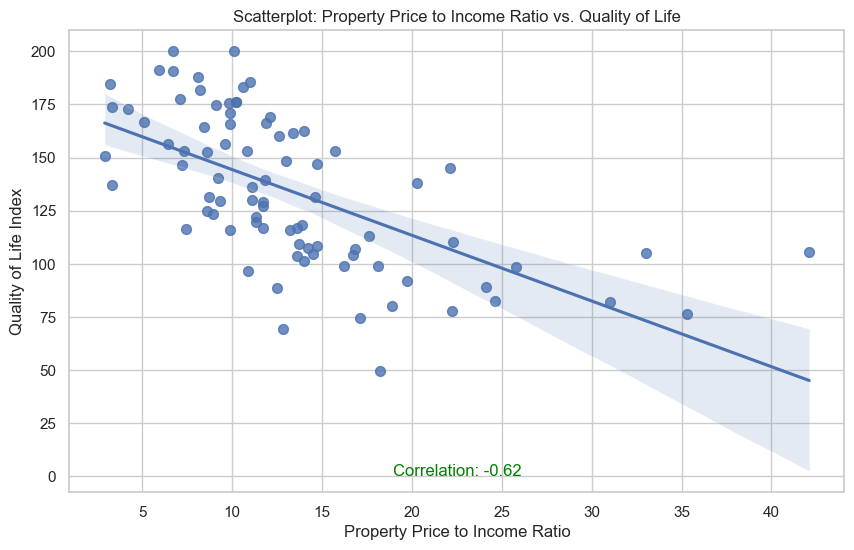

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'property_price_to_income_ratio', y = 'quality_of_life_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['quality_of_life_index'], df['property_price_to_income_ratio'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Property Price to Income Ratio')
plt.ylabel('Quality of Life Index')
plt.title('Scatterplot: Property Price to Income Ratio vs. Quality of Life')

# Show the plot
plt.show()

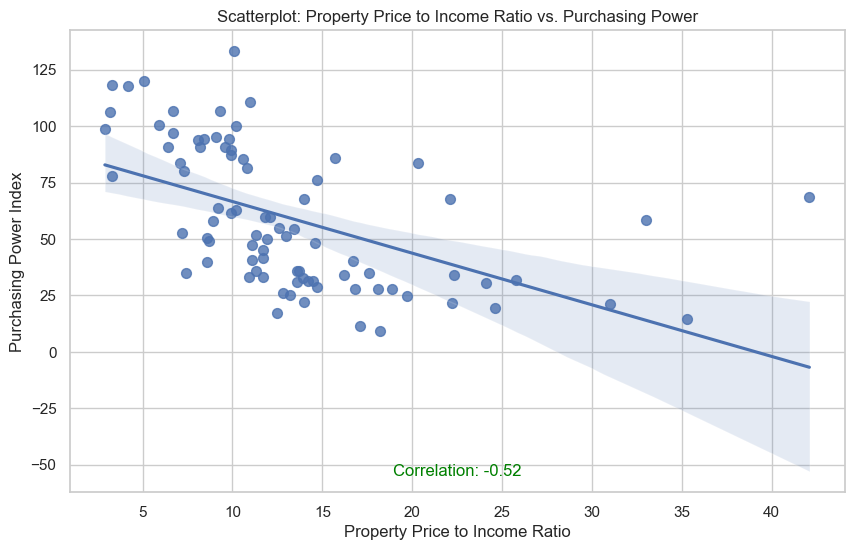

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'property_price_to_income_ratio', y = 'purchasing_power_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['purchasing_power_index'], df['property_price_to_income_ratio'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Property Price to Income Ratio')
plt.ylabel('Purchasing Power Index')
plt.title('Scatterplot: Property Price to Income Ratio vs. Purchasing Power')

# Show the plot
plt.show()

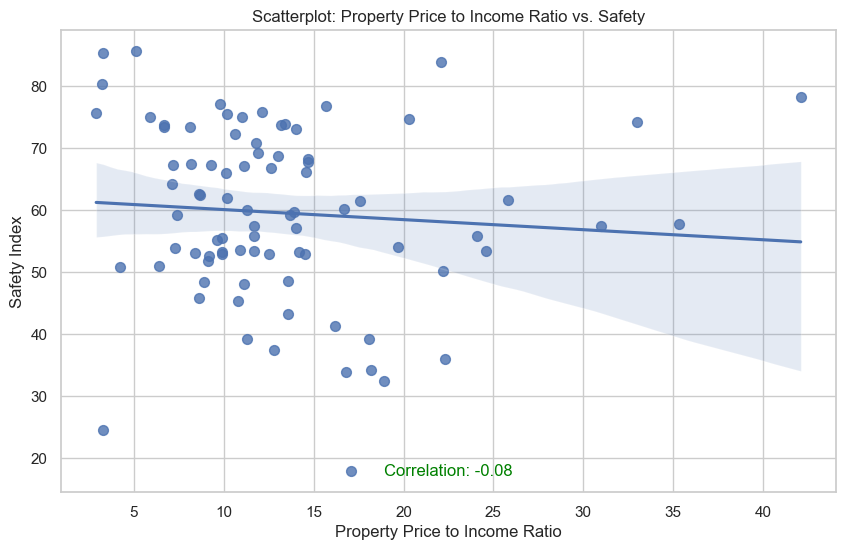

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'property_price_to_income_ratio', y = 'safety_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['safety_index'], df['property_price_to_income_ratio'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Property Price to Income Ratio')
plt.ylabel('Safety Index')
plt.title('Scatterplot: Property Price to Income Ratio vs. Safety')

# Show the plot
plt.show()

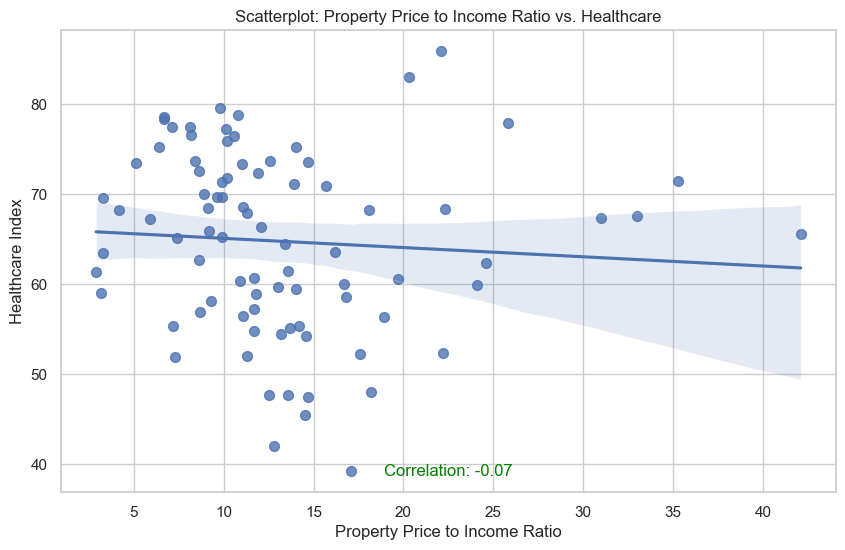

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'property_price_to_income_ratio', y = 'health_care_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['health_care_index'], df['property_price_to_income_ratio'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Property Price to Income Ratio')
plt.ylabel('Healthcare Index')
plt.title('Scatterplot: Property Price to Income Ratio vs. Healthcare')

# Show the plot
plt.show()

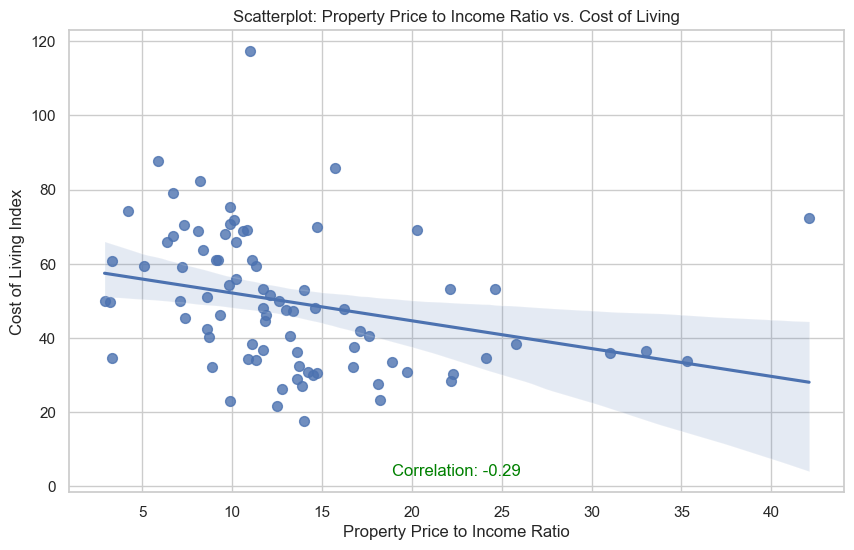

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'property_price_to_income_ratio', y = 'cost_of_living_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['cost_of_living_index'], df['property_price_to_income_ratio'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Property Price to Income Ratio')
plt.ylabel('Cost of Living Index')
plt.title('Scatterplot: Property Price to Income Ratio vs. Cost of Living')

# Show the plot
plt.show()

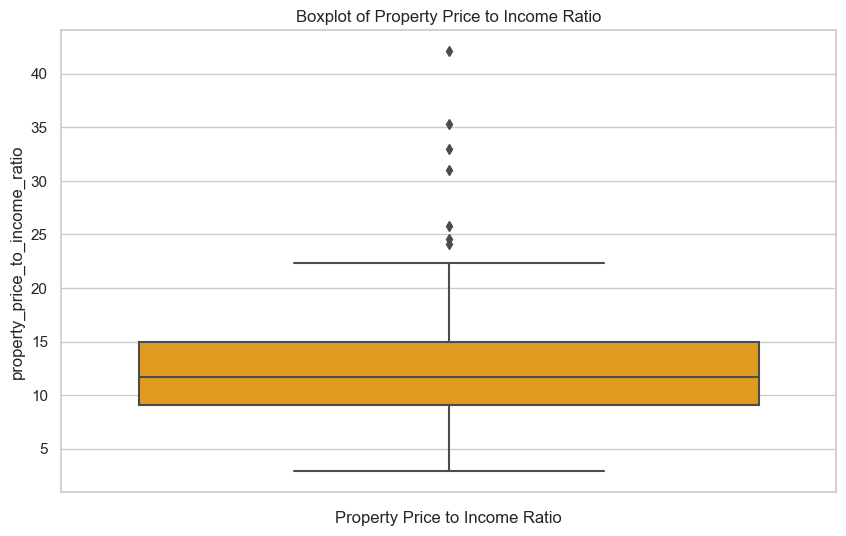

In [46]:
# Showing boxplot of the property price to income ratio and the data distribution 
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set(style = "whitegrid") 
boxplot_color = 'orange'
plt.figure(figsize = (10, 6))
sns.boxplot(y = df['property_price_to_income_ratio'], color = boxplot_color)
plt.xlabel('Property Price to Income Ratio')
plt.title('Boxplot of Property Price to Income Ratio')
plt.show()

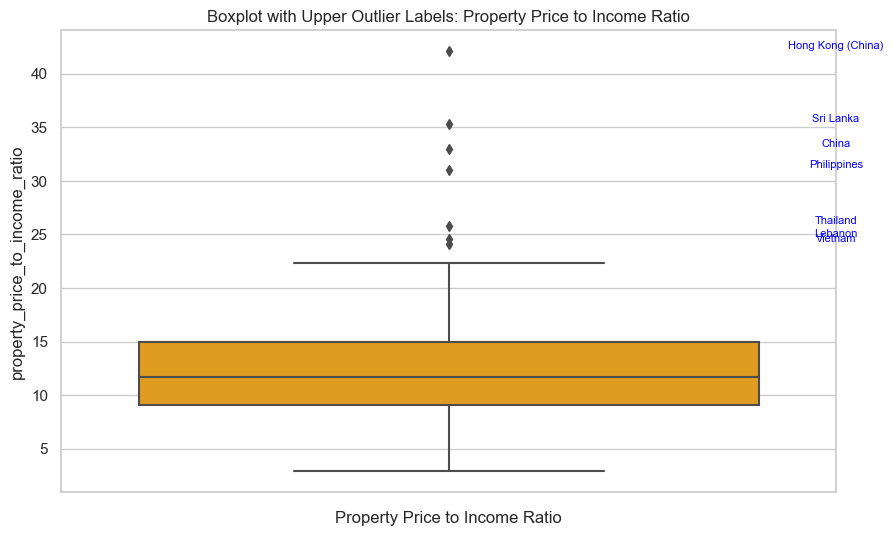

In [47]:
# Showing boxplot with outlier label
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
Q1 = df['property_price_to_income_ratio'].quantile(0.25)
Q3 = df['property_price_to_income_ratio'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
upper_outliers = df[df['property_price_to_income_ratio'] > upper_bound]

plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(y = df['property_price_to_income_ratio'], color = 'orange')
for _, row in upper_outliers.iterrows():
    plt.text(0.5, row['property_price_to_income_ratio'], row['country'],
             ha='center', va='bottom', fontsize=8, color='blue')
plt.xlabel('Property Price to Income Ratio')
plt.title('Boxplot with Upper Outlier Labels: Property Price to Income Ratio')
plt.show()

In [48]:
# Showing the statistical measurement to tell us the data distribution 
df['property_price_to_income_ratio'].describe()

count    84.000000
mean     13.252381
std       7.077224
min       2.900000
25%       9.050000
50%      11.700000
75%      14.950000
max      42.100000
Name: property_price_to_income_ratio, dtype: float64

# Exploring the Traffic Commute Time Index

In [49]:
# show the first 5 rows 
df[['rank', 'country', 'quality_of_life_index', 'purchasing_power_index', 'safety_index', 'health_care_index', 'cost_of_living_index', 
    'traffic_commute_time_index', 'property_price_to_income_ratio']].sort_values(by = 'traffic_commute_time_index', ascending = True).head()

rank      country  quality_of_life_index  purchasing_power_index  \
10    11      Estonia                  176.4                    62.7   
2      3      Iceland                  191.1                   100.4   
6      7         Oman                  184.8                   106.2   
34    35       Cyprus                  146.5                    52.6   
1      2  Netherlands                  200.1                   106.9   

    safety_index  health_care_index  cost_of_living_index  \
10          75.5               75.9                  55.9   
2           75.0               67.2                  87.7   
6           80.4               59.0                  49.6   
34          67.4               55.3                  59.2   
1           73.8               78.6                  67.5   

    traffic_commute_time_index  property_price_to_income_ratio  
10                        22.2                            10.2  
2                         22.3                             5.9  
6                         22.3                             3.2  
34                        22.8                             7.2  
1                         23.8                             6.7

In [50]:
# show the first 5 rows 
df[['rank', 'country', 'quality_of_life_index', 'purchasing_power_index', 'safety_index', 'health_care_index', 'cost_of_living_index', 
    'traffic_commute_time_index', 'property_price_to_income_ratio']].sort_values(by = 'traffic_commute_time_index', ascending = True).tail()

rank     country  quality_of_life_index  purchasing_power_index  \
78    79        Peru                   80.3                    28.0   
67    68       Kenya                  103.5                    31.0   
80    81   Sri Lanka                   76.5                    14.6   
82    83  Bangladesh                   69.5                    26.2   
83    84     Nigeria                   49.5                     9.4   

    safety_index  health_care_index  cost_of_living_index  \
78          32.5               56.3                  33.6   
67          43.2               61.5                  28.9   
80          57.8               71.5                  33.8   
82          37.5               42.0                  26.2   
83          34.2               48.0                  23.2   

    traffic_commute_time_index  property_price_to_income_ratio  
78                        49.1                            18.9  
67                        51.6                            13.6  
80                        56.4                            35.3  
82                        57.4                            12.8  
83                        62.8                            18.2

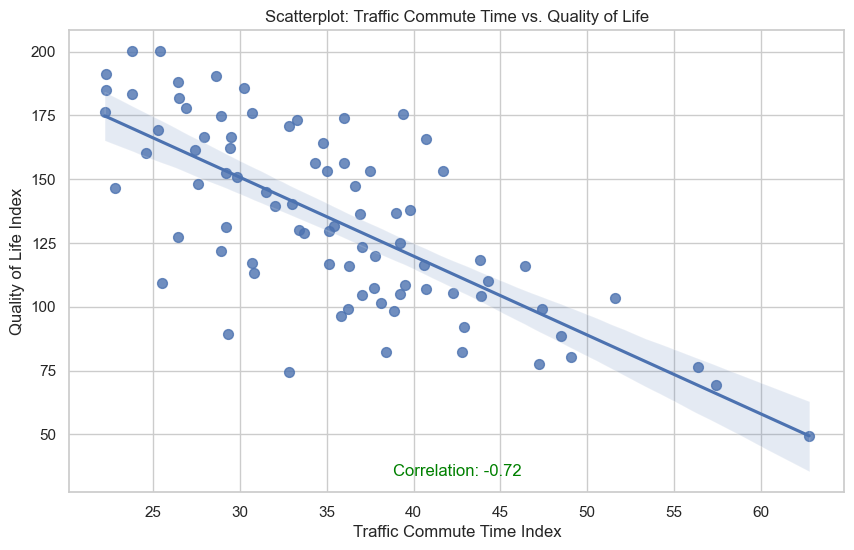

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'traffic_commute_time_index', y = 'quality_of_life_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['quality_of_life_index'], df['traffic_commute_time_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Traffic Commute Time Index')
plt.ylabel('Quality of Life Index')
plt.title('Scatterplot: Traffic Commute Time vs. Quality of Life')

# Show the plot
plt.show()

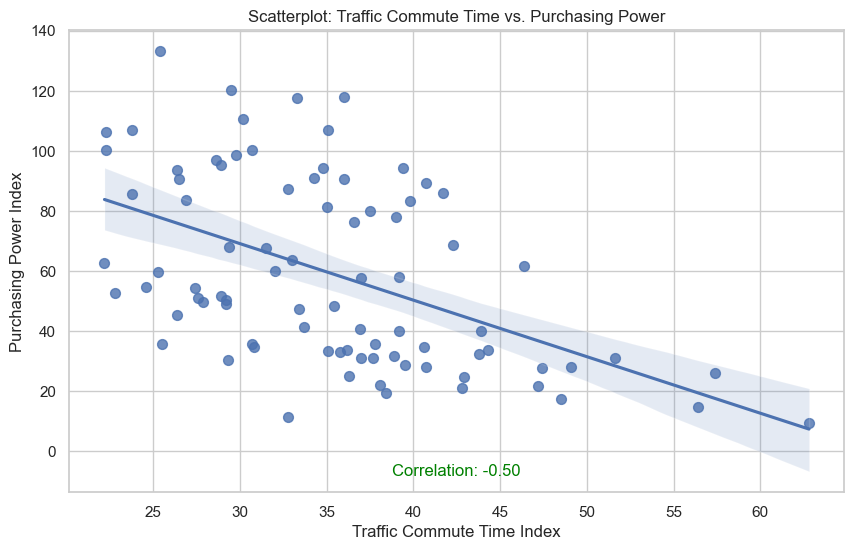

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'traffic_commute_time_index', y = 'purchasing_power_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['purchasing_power_index'], df['traffic_commute_time_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Traffic Commute Time Index')
plt.ylabel('Purchasing Power Index')
plt.title('Scatterplot: Traffic Commute Time vs. Purchasing Power')

# Show the plot
plt.show()

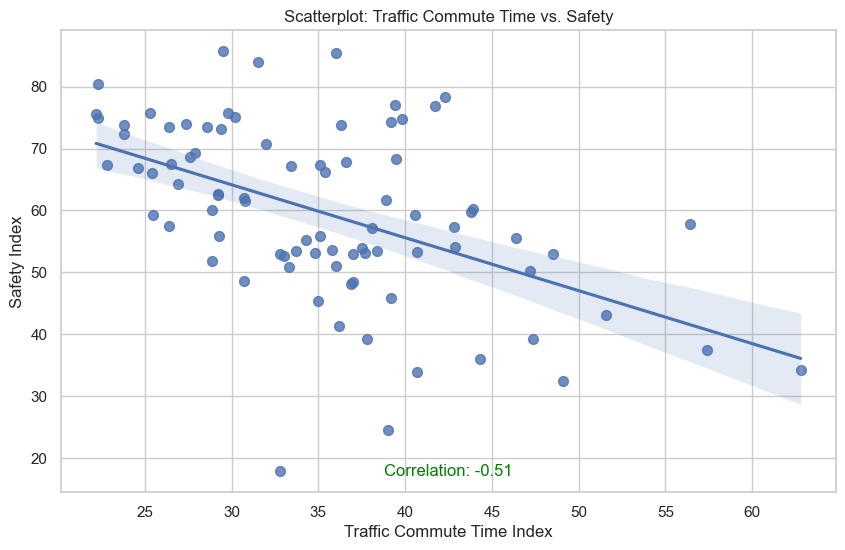

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'traffic_commute_time_index', y = 'safety_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['safety_index'], df['traffic_commute_time_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Traffic Commute Time Index')
plt.ylabel('Safety Index')
plt.title('Scatterplot: Traffic Commute Time vs. Safety')

# Show the plot
plt.show()

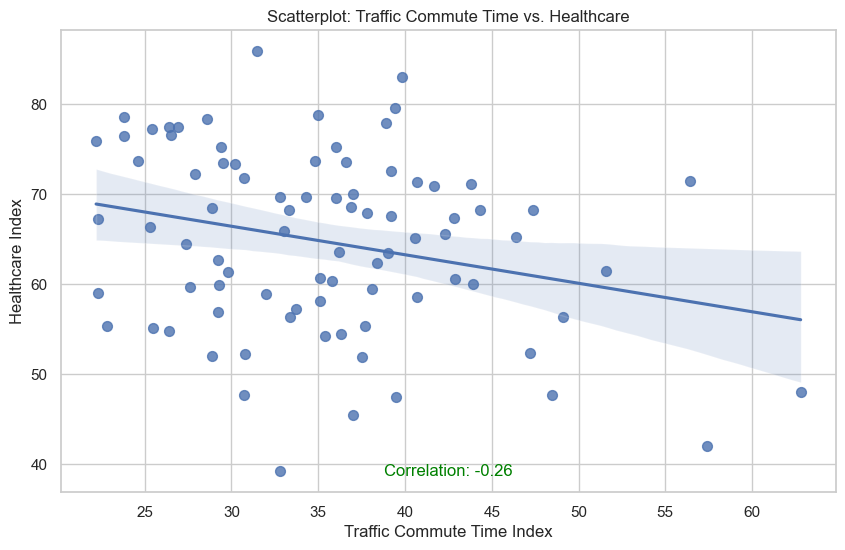

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'traffic_commute_time_index', y = 'health_care_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['health_care_index'], df['traffic_commute_time_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Traffic Commute Time Index')
plt.ylabel('Healthcare Index')
plt.title('Scatterplot: Traffic Commute Time vs. Healthcare')

# Show the plot
plt.show()

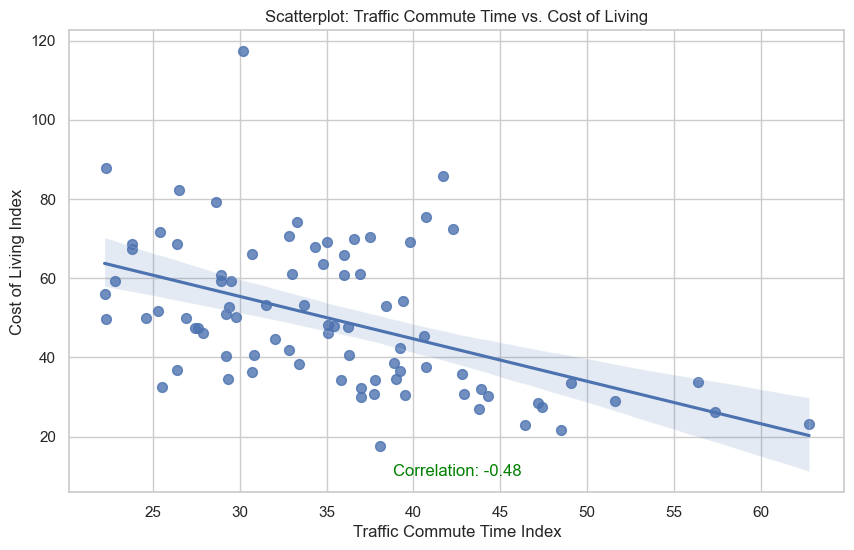

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'traffic_commute_time_index', y = 'cost_of_living_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['cost_of_living_index'], df['traffic_commute_time_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Traffic Commute Time Index')
plt.ylabel('Cost of Living Index')
plt.title('Scatterplot: Traffic Commute Time vs. Cost of Living')

# Show the plot
plt.show()

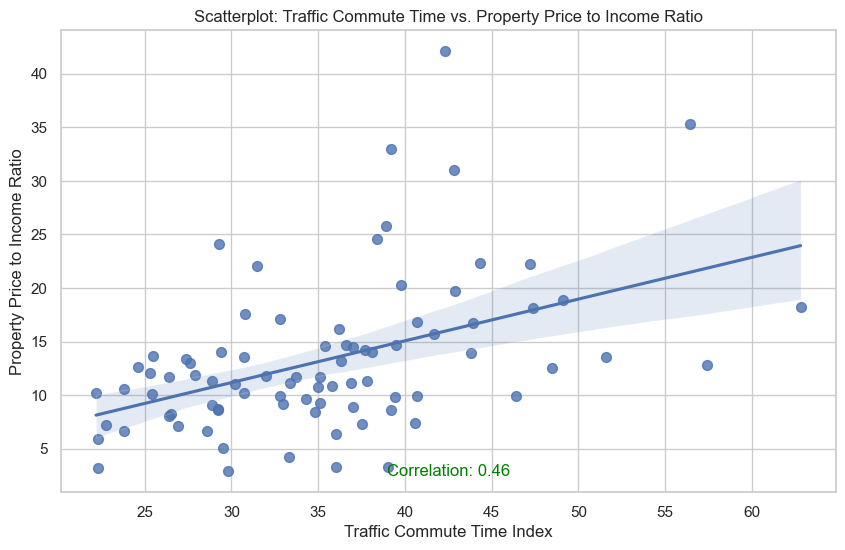

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'traffic_commute_time_index', y = 'property_price_to_income_ratio', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['property_price_to_income_ratio'], df['traffic_commute_time_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Traffic Commute Time Index')
plt.ylabel('Property Price to Income Ratio')
plt.title('Scatterplot: Traffic Commute Time vs. Property Price to Income Ratio')

# Show the plot
plt.show()

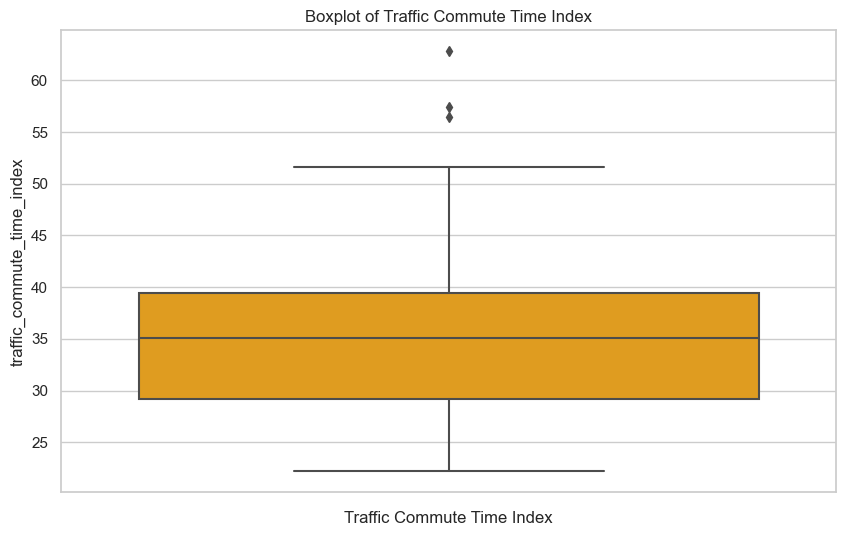

In [57]:
# Showing boxplot of the traffic commute time index and the data distribution 
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set(style = "whitegrid") 
boxplot_color = 'orange'
plt.figure(figsize = (10, 6))
sns.boxplot(y = df['traffic_commute_time_index'], color = boxplot_color)
plt.xlabel('Traffic Commute Time Index')
plt.title('Boxplot of Traffic Commute Time Index')
plt.show()

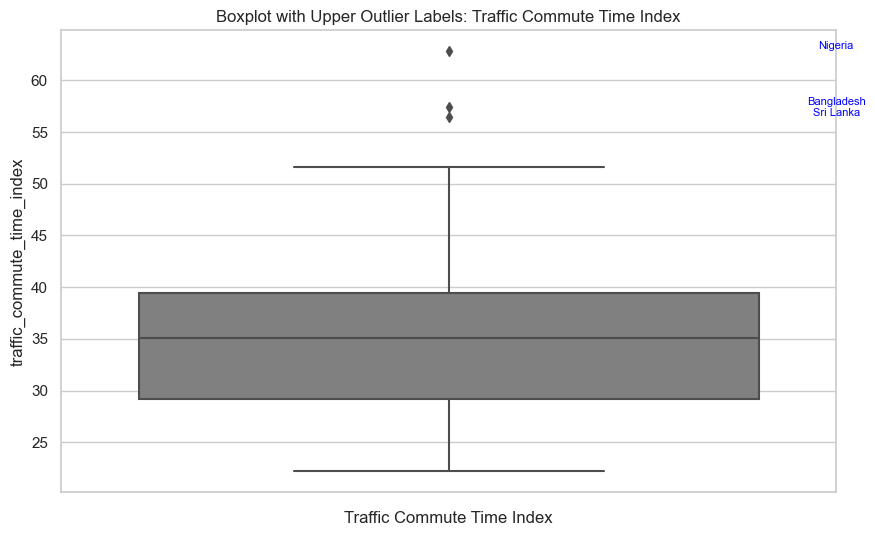

In [58]:
# Showing boxplot with outlier label
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
Q1 = df['traffic_commute_time_index'].quantile(0.25)
Q3 = df['traffic_commute_time_index'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
upper_outliers = df[df['traffic_commute_time_index'] > upper_bound]

plt.figure(figsize=(10, 6))# Showing the statistical measurement to tell us the data distribution 
df['property_price_to_income_ratio'].describe()
boxplot = sns.boxplot(y = df['traffic_commute_time_index'], color = 'grey')
for _, row in upper_outliers.iterrows():
    plt.text(0.5, row['traffic_commute_time_index'], row['country'],
             ha='center', va='bottom', fontsize=8, color='blue')
plt.xlabel('Traffic Commute Time Index')
plt.title('Boxplot with Upper Outlier Labels: Traffic Commute Time Index')
plt.show()

In [59]:
# Showing the statistical measurement to tell us the data distribution 
df['traffic_commute_time_index'].describe()

count    84.000000
mean     35.325000
std       8.293674
min      22.200000
25%      29.200000
50%      35.100000
75%      39.425000
max      62.800000
Name: traffic_commute_time_index, dtype: float64

# Exploring the Pollution Index

In [60]:
# show the first 5 rows 
df[['rank', 'country', 'quality_of_life_index', 'purchasing_power_index', 'safety_index', 'health_care_index', 'cost_of_living_index', 
    'pollution_index', 'traffic_commute_time_index', 
    'property_price_to_income_ratio']].sort_values(by = 'pollution_index', ascending = True).head()

rank  country  quality_of_life_index  purchasing_power_index  \
4      5  Finland                  188.1                    93.8   
2      3  Iceland                  191.1                   100.4   
10    11  Estonia                  176.4                    62.7   
13    14   Sweden                  174.8                    95.3   
8      9   Norway                  181.8                    90.7   

    safety_index  health_care_index  cost_of_living_index  pollution_index  \
4           73.5               77.5                  68.7             11.8   
2           75.0               67.2                  87.7             15.7   
10          75.5               75.9                  55.9             17.1   
13          51.9               68.5                  60.9             17.9   
8           67.5               76.6                  82.2             18.0   

    traffic_commute_time_index  property_price_to_income_ratio  
4                         26.4                             8.1  
2                         22.3                             5.9  
10                        22.2                            10.2  
13                        28.9                             9.1  
8                         26.5                             8.2

In [61]:
# show the first 5 rows 
df[['rank', 'country', 'quality_of_life_index', 'purchasing_power_index', 'safety_index', 'health_care_index', 'cost_of_living_index', 
    'pollution_index', 'traffic_commute_time_index', 
    'property_price_to_income_ratio']].sort_values(by = 'pollution_index', ascending = True).tail()

rank     country  quality_of_life_index  purchasing_power_index  \
78    79        Peru                   80.3                    28.0   
74    75     Vietnam                   89.3                    30.3   
82    83  Bangladesh                   69.5                    26.2   
83    84     Nigeria                   49.5                     9.4   
76    77     Lebanon                   82.4                    19.4   

    safety_index  health_care_index  cost_of_living_index  pollution_index  \
78          32.5               56.3                  33.6             83.0   
74          55.9               59.9                  34.5             84.2   
82          37.5               42.0                  26.2             85.2   
83          34.2               48.0                  23.2             88.2   
76          53.5               62.4                  53.1             89.4   

    traffic_commute_time_index  property_price_to_income_ratio  
78                        49.1                            18.9  
74                        29.3                            24.1  
82                        57.4                            12.8  
83                        62.8                            18.2  
76                        38.4                            24.6

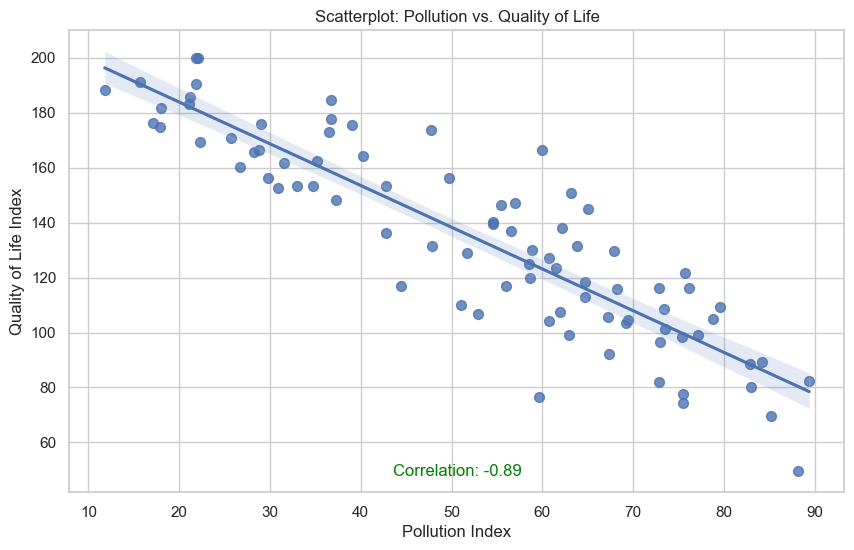

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'pollution_index', y = 'quality_of_life_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['quality_of_life_index'], df['pollution_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Pollution Index')
plt.ylabel('Quality of Life Index')
plt.title('Scatterplot: Pollution vs. Quality of Life')

# Show the plot
plt.show()

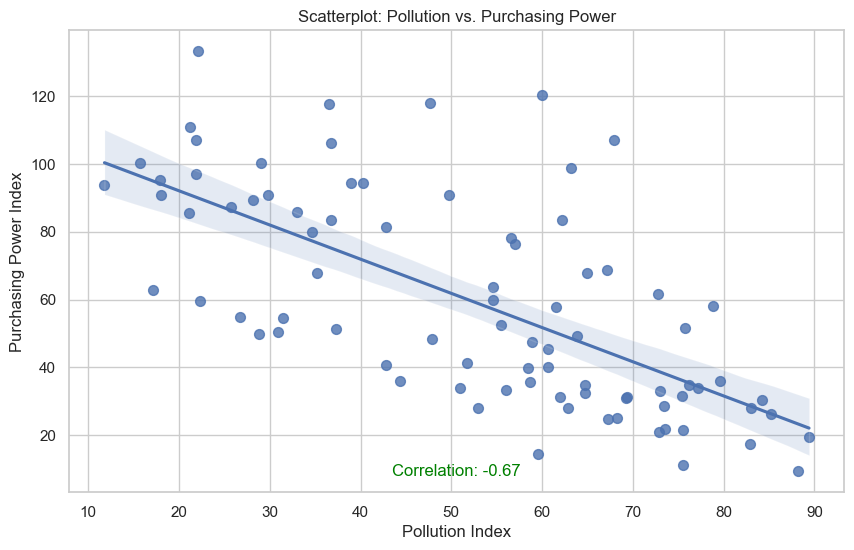

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'pollution_index', y = 'purchasing_power_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['purchasing_power_index'], df['pollution_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Pollution Index')
plt.ylabel('Purchasing Power Index')
plt.title('Scatterplot: Pollution vs. Purchasing Power')

# Show the plot
plt.show()

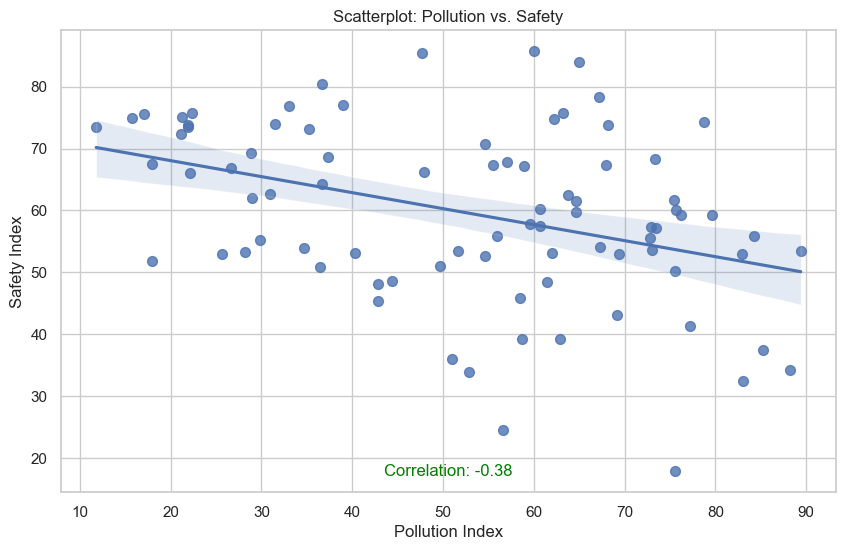

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'pollution_index', y = 'safety_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['safety_index'], df['pollution_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Pollution Index')
plt.ylabel('Safety Index')
plt.title('Scatterplot: Pollution vs. Safety')

# Show the plot
plt.show()

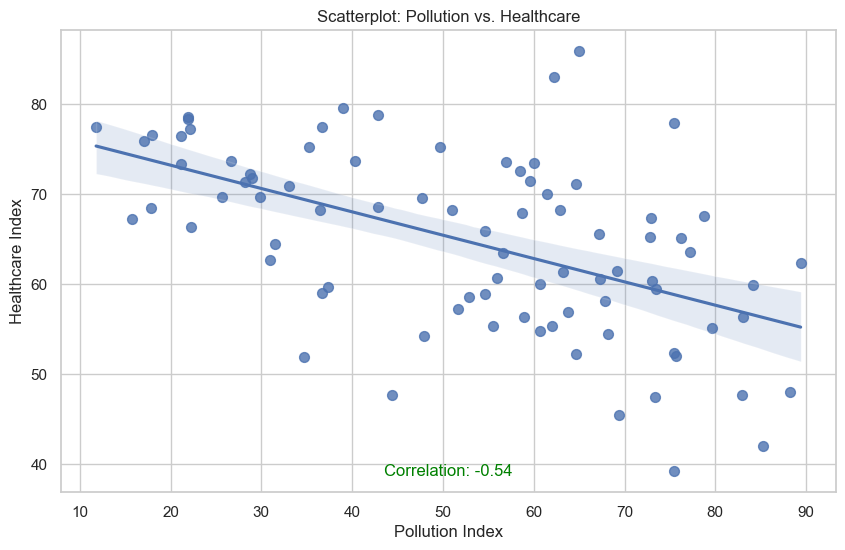

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'pollution_index', y = 'health_care_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['health_care_index'], df['pollution_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Pollution Index')
plt.ylabel('Healthcare Index')
plt.title('Scatterplot: Pollution vs. Healthcare')

# Show the plot
plt.show()

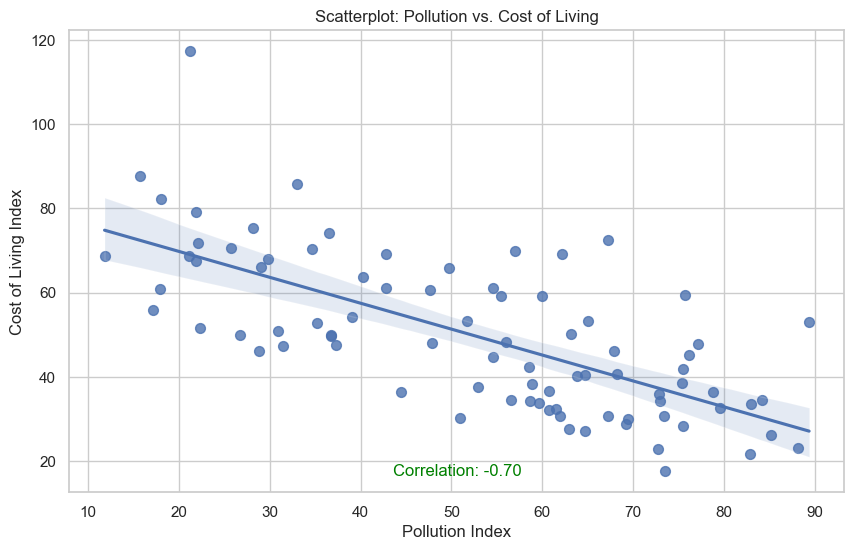

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'pollution_index', y = 'cost_of_living_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['cost_of_living_index'], df['pollution_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Pollution Index')
plt.ylabel('Cost of Living Index')
plt.title('Scatterplot: Pollution vs. Cost of Living')

# Show the plot
plt.show()

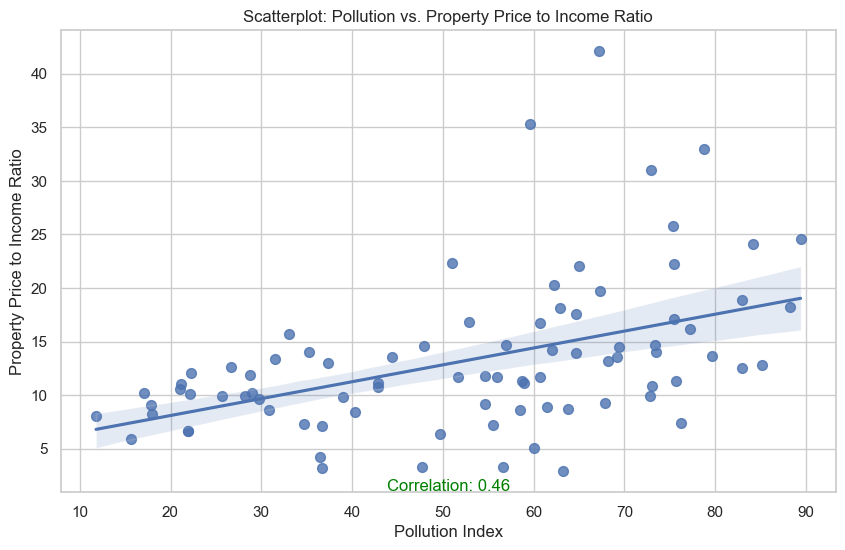

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'pollution_index', y = 'property_price_to_income_ratio', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['property_price_to_income_ratio'], df['pollution_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'top', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Pollution Index')
plt.ylabel('Property Price to Income Ratio')
plt.title('Scatterplot: Pollution vs. Property Price to Income Ratio')

# Show the plot
plt.show()

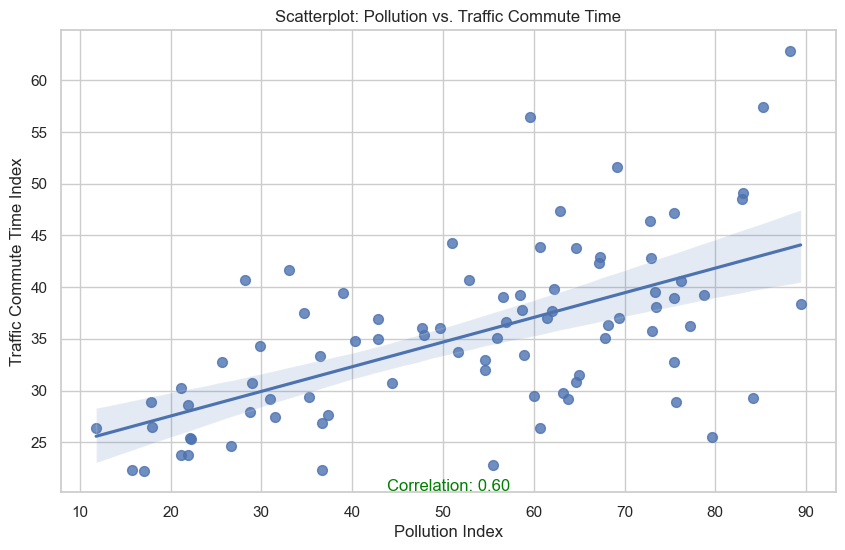

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'pollution_index', y = 'traffic_commute_time_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['traffic_commute_time_index'], df['pollution_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'top', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Pollution Index')
plt.ylabel('Traffic Commute Time Index')
plt.title('Scatterplot: Pollution vs. Traffic Commute Time')

# Show the plot
plt.show()

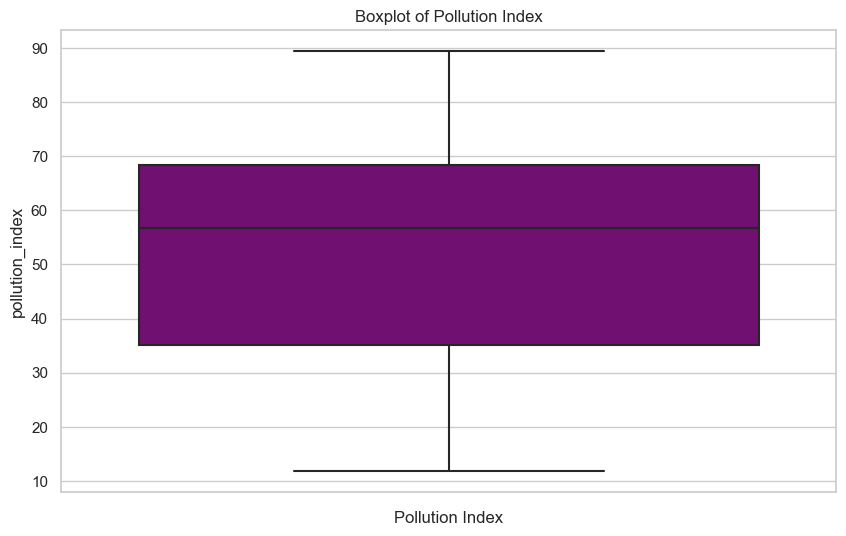

In [69]:
# Showing boxplot of the pollution index and the data distribution 
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set(style = "whitegrid") 
boxplot_color = 'purple'
plt.figure(figsize = (10, 6))
sns.boxplot(y = df['pollution_index'], color = boxplot_color)
plt.xlabel('Pollution Index')
plt.title('Boxplot of Pollution Index')
plt.show()

In [70]:
# Showing the statistical measurement to tell us the data distribution 
df['pollution_index'].describe()

count    84.000000
mean     52.677381
std      20.780884
min      11.800000
25%      35.075000
50%      56.800000
75%      68.450000
max      89.400000
Name: pollution_index, dtype: float64

# Exploring the Climate Index

In [71]:
# show the first 5 rows 
df[['rank', 'country', 'quality_of_life_index', 'purchasing_power_index', 'safety_index', 'health_care_index', 'cost_of_living_index', 
    'climate_index', 'pollution_index', 'traffic_commute_time_index', 
    'property_price_to_income_ratio']].sort_values(by = 'climate_index', ascending = False).head()

rank    country  quality_of_life_index  purchasing_power_index  \
81    82  Venezuela                   74.4                    11.3   
67    68      Kenya                  103.5                    31.0   
58    59  Argentina                  110.2                    33.9   
40    41    Uruguay                  136.2                    40.6   
19    20   Portugal                  166.5                    49.8   

    safety_index  health_care_index  cost_of_living_index  climate_index  \
81          17.9               39.2                  41.8           99.9   
67          43.2               61.5                  28.9           99.8   
58          36.0               68.3                  30.3           98.3   
40          48.1               68.6                  61.0           98.0   
19          69.3               72.3                  46.1           97.8   

    pollution_index  traffic_commute_time_index  \
81             75.5                        32.8   
67             69.2                        51.6   
58             51.0                        44.3   
40             42.8                        36.9   
19             28.8                        27.9   

    property_price_to_income_ratio  
81                            17.1  
67                            13.6  
58                            22.3  
40                            11.1  
19                            11.9

In [72]:
# show the first 5 rows 
df[['rank', 'country', 'quality_of_life_index', 'purchasing_power_index', 'safety_index', 'health_care_index', 'cost_of_living_index', 
    'climate_index', 'pollution_index', 'traffic_commute_time_index', 
    'property_price_to_income_ratio']].sort_values(by = 'climate_index', ascending = False).tail()

rank               country  quality_of_life_index  purchasing_power_index  \
14    15  United Arab Emirates                  173.8                   118.0   
31    32          Saudi Arabia                  150.7                    98.7   
72    73            Kazakhstan                   96.5                    33.1   
18    19                 Qatar                  166.6                   120.2   
44    45                Kuwait                  129.7                   106.9   

    safety_index  health_care_index  cost_of_living_index  climate_index  \
14          85.4               69.6                  60.7           45.8   
31          75.7               61.4                  50.1           41.4   
72          53.6               60.4                  34.3           39.8   
18          85.7               73.5                  59.3           36.0   
44          67.4               58.1                  46.1           20.2   

    pollution_index  traffic_commute_time_index  \
14             47.7                        36.0   
31             63.2                        29.8   
72             73.0                        35.8   
18             60.0                        29.5   
44             67.9                        35.1   

    property_price_to_income_ratio  
14                             3.3  
31                             2.9  
72                            10.9  
18                             5.1  
44                             9.3

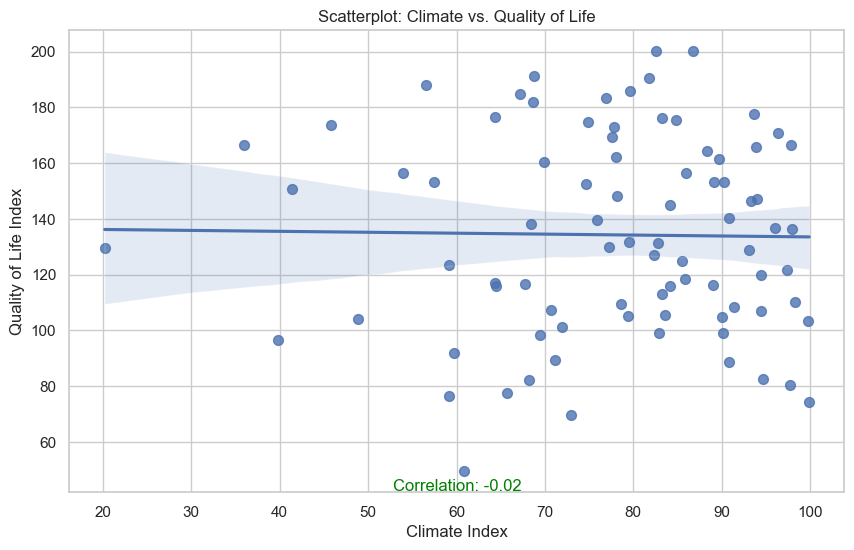

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'climate_index', y = 'quality_of_life_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['quality_of_life_index'], df['climate_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'top', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Climate Index')
plt.ylabel('Quality of Life Index')
plt.title('Scatterplot: Climate vs. Quality of Life')

# Show the plot
plt.show()

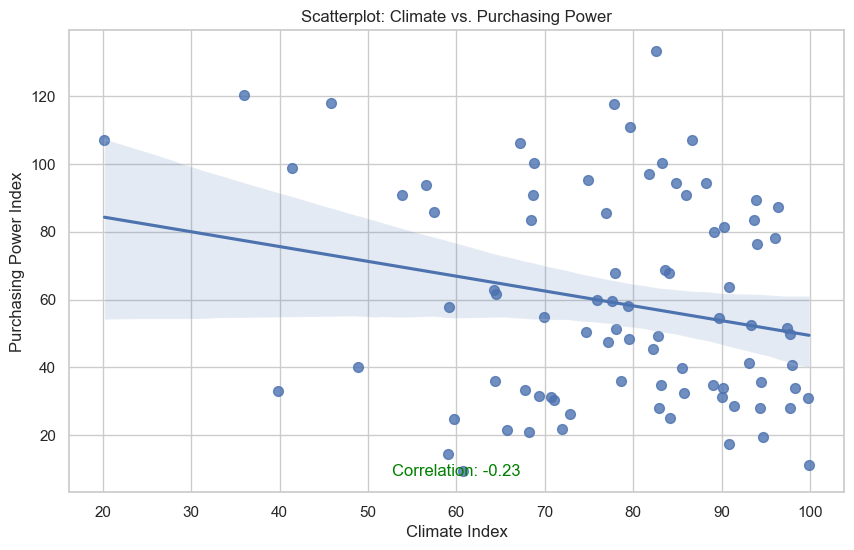

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'climate_index', y = 'purchasing_power_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['purchasing_power_index'], df['climate_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Climate Index')
plt.ylabel('Purchasing Power Index')
plt.title('Scatterplot: Climate vs. Purchasing Power')

# Show the plot
plt.show()

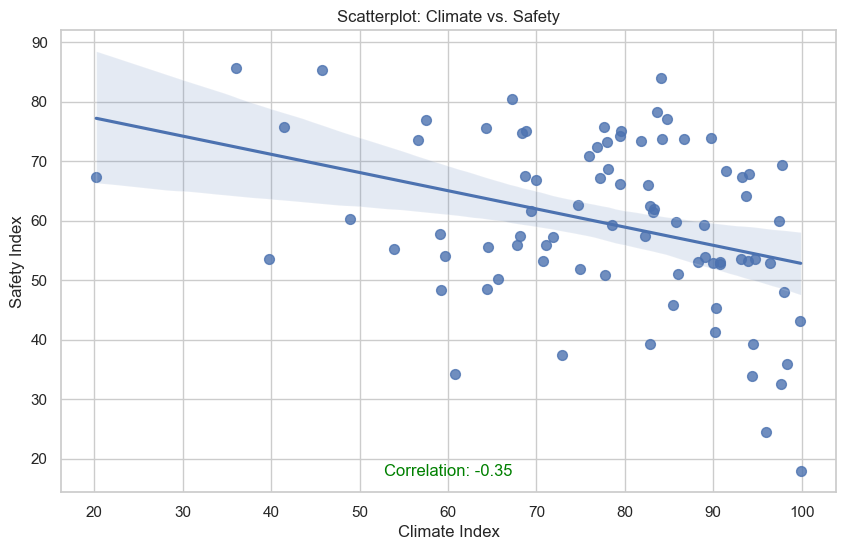

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'climate_index', y = 'safety_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['safety_index'], df['climate_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Climate Index')
plt.ylabel('Safety Index')
plt.title('Scatterplot: Climate vs. Safety')

# Show the plot
plt.show()

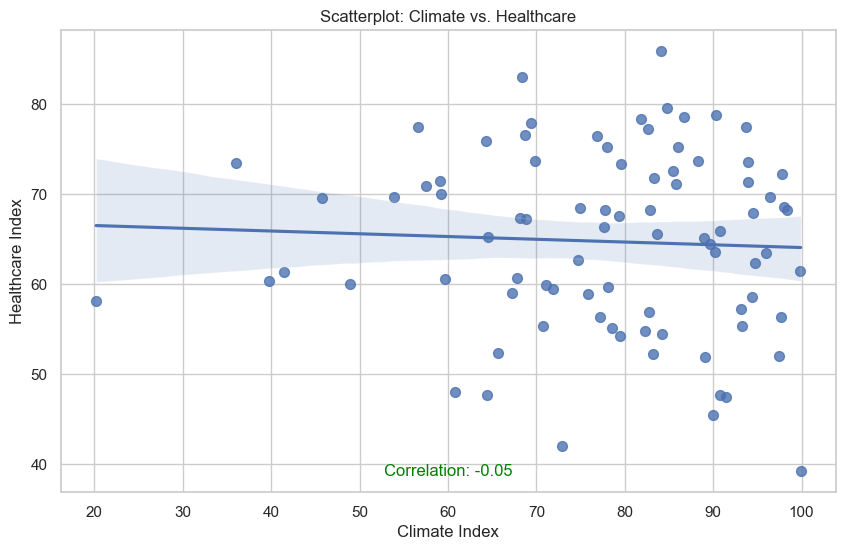

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'climate_index', y = 'health_care_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['health_care_index'], df['climate_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Climate Index')
plt.ylabel('Healthcare Index')
plt.title('Scatterplot: Climate vs. Healthcare')

# Show the plot
plt.show()

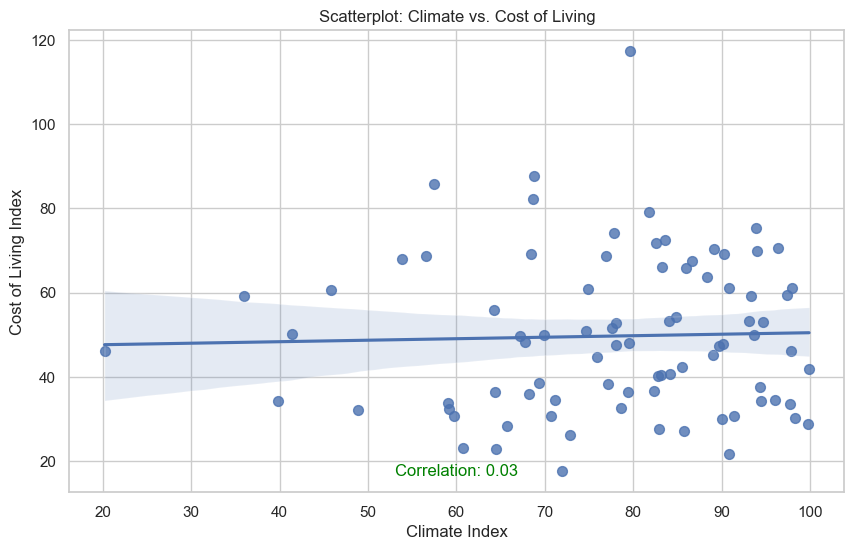

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'climate_index', y = 'cost_of_living_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['cost_of_living_index'], df['climate_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'bottom', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Climate Index')
plt.ylabel('Cost of Living Index')
plt.title('Scatterplot: Climate vs. Cost of Living')

# Show the plot
plt.show()

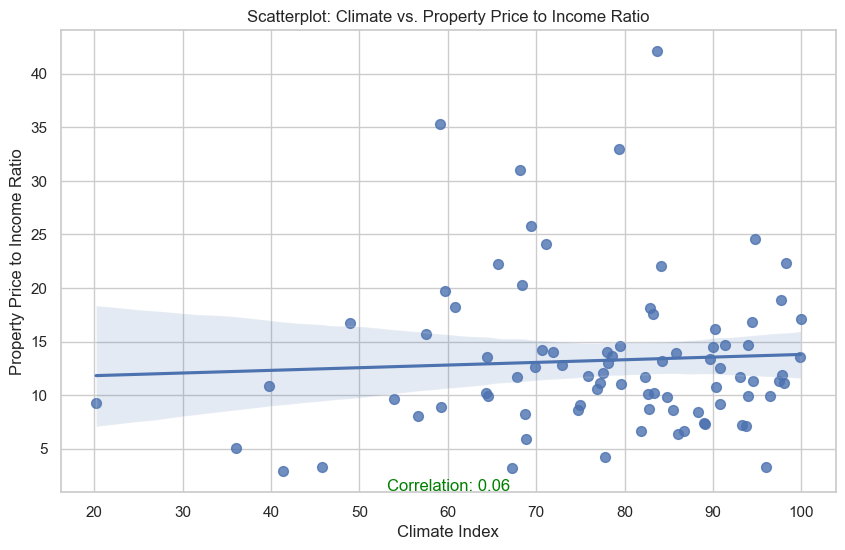

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'climate_index', y = 'property_price_to_income_ratio', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['property_price_to_income_ratio'], df['climate_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'top', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Climate Index')
plt.ylabel('Property Price to Income Ratio')
plt.title('Scatterplot: Climate vs. Property Price to Income Ratio')

# Show the plot
plt.show()

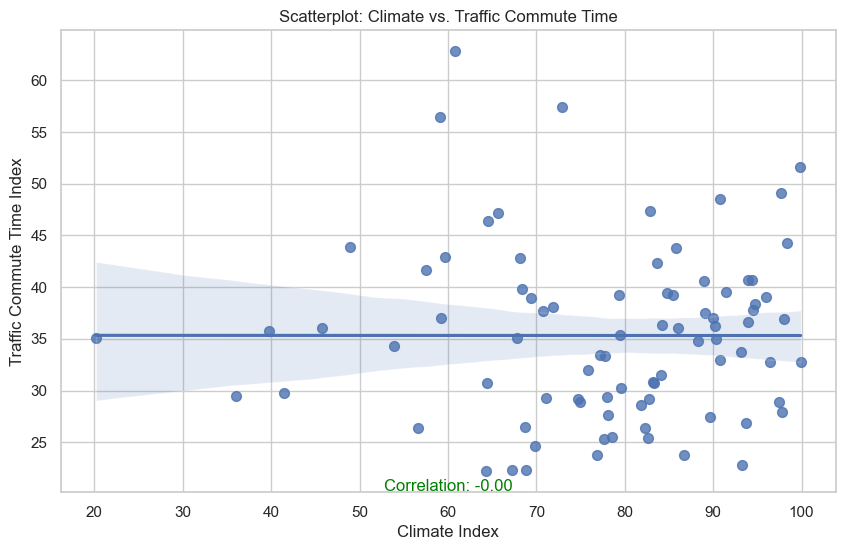

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'climate_index', y = 'traffic_commute_time_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['traffic_commute_time_index'], df['climate_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'top', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Climate Index')
plt.ylabel('Traffic Commute Time Index')
plt.title('Scatterplot: Climate vs. Traffic Commute Time')

# Show the plot
plt.show()

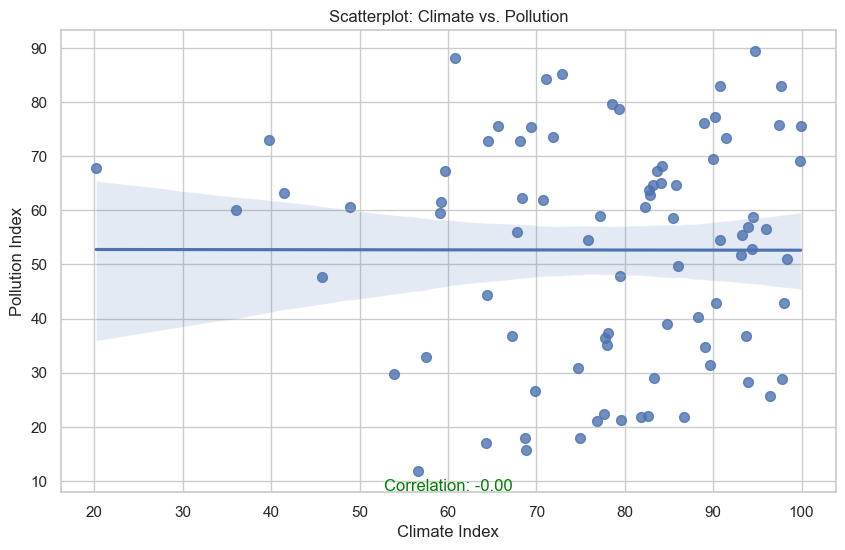

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Scatterplot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x = 'climate_index', y = 'pollution_index', data = df, scatter_kws = {'s': 50})

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(df['pollution_index'], df['climate_index'])

# Annotate the plot with the correlation coefficient
plt.annotate(f'Correlation: {correlation_coefficient:.2f}',
             xy = (0.5, 0), xycoords = 'axes fraction',
             xytext = (0, 10), textcoords = 'offset points',
             ha = 'center', va = 'top', fontsize = 12, color = 'green')

# Set labels and title
plt.xlabel('Climate Index')
plt.ylabel('Pollution Index')
plt.title('Scatterplot: Climate vs. Pollution')

# Show the plot
plt.show()

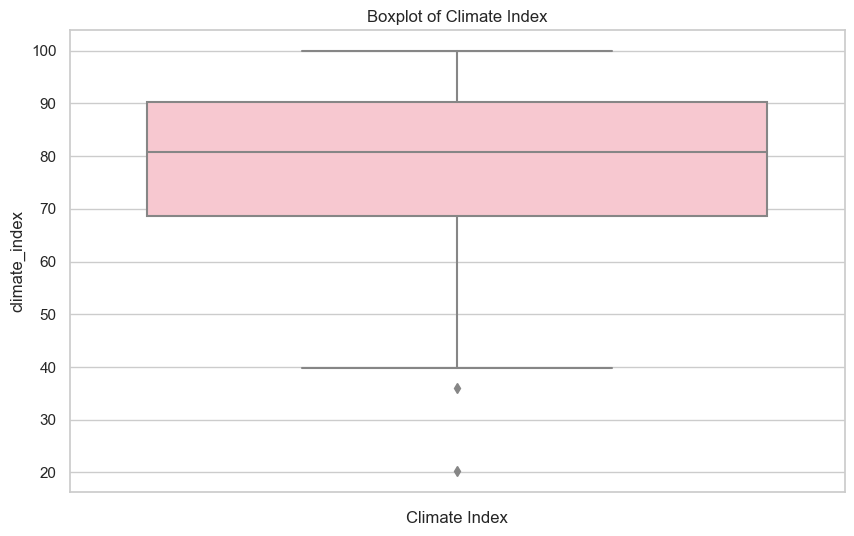

In [81]:
# Showing boxplot of the climate index and the data distribution 
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set(style = "whitegrid") 
boxplot_color = 'pink'
plt.figure(figsize = (10, 6))
sns.boxplot(y = df['climate_index'], color = boxplot_color)
plt.xlabel('Climate Index')
plt.title('Boxplot of Climate Index')
plt.show()

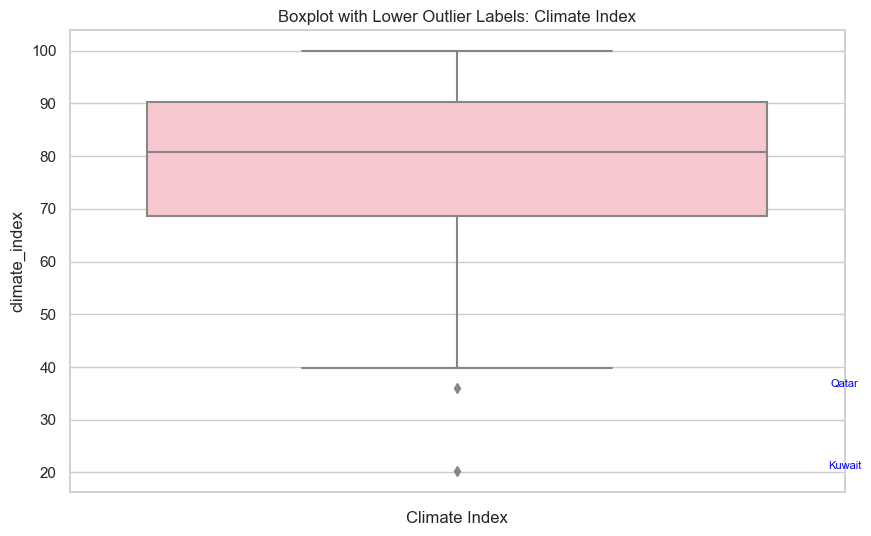

In [82]:
# Showing boxplot with outlier label
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
Q1 = df['climate_index'].quantile(0.25)
Q3 = df['climate_index'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
lower_outliers = df[df['climate_index'] < lower_bound]

plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(y=df['climate_index'], color='pink')
for _, row in lower_outliers.iterrows():
    plt.text(0.5, row['climate_index'], row['country'],
             ha='center', va='bottom', fontsize=8, color='blue')
plt.xlabel('Climate Index')
plt.title('Boxplot with Lower Outlier Labels: Climate Index')
plt.show()

In [83]:
# Showing the statistical measurement to tell us the data distribution 
df['climate_index'].describe()

count    84.000000
mean     77.775000
std      16.219792
min      20.200000
25%      68.625000
50%      80.700000
75%      90.225000
max      99.900000
Name: climate_index, dtype: float64

The positive correlation between `quality_of_life_index` and the building factors:
- `purchasing_power_index`: strong  (0.87)
- `cost_of_living_index`: strong (0.75) 
- `health_care_index`: moderate  (0.62)
- `safety_index`: moderate  (0.57)

The negative correlation between `quality_of_life_index` and the building factors:
- `pollution_index`: strong (-0.89)
- `traffic_commute_time_index`: strong (-0.72)
- `property_price_to_income_ratio`: moderate (-0.62)
- `climate_index`: none (-0.02)

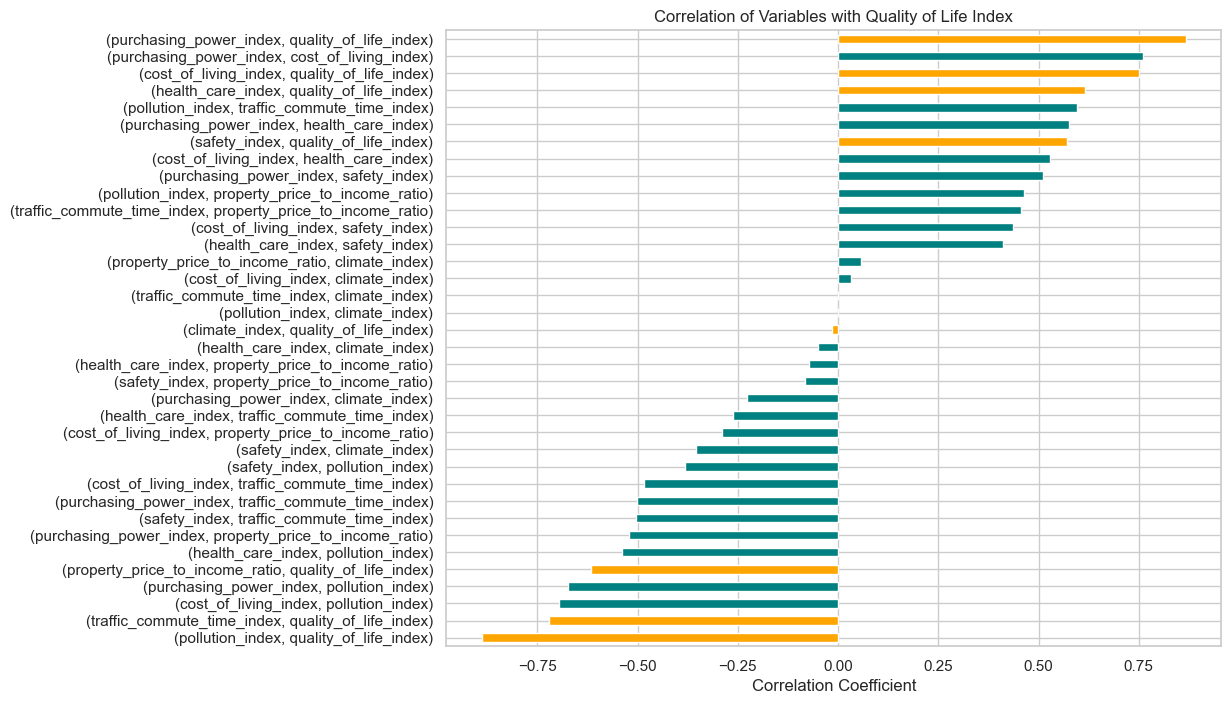

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Select relevant columns for correlation analysis
selected_columns = ['purchasing_power_index', 'cost_of_living_index', 'health_care_index',
                     'safety_index', 'pollution_index', 'traffic_commute_time_index',
                     'property_price_to_income_ratio', 'climate_index', 'quality_of_life_index']

# Create a correlation matrix
correlation_matrix = df[selected_columns].corr()

# Flatten the upper triangular part of the matrix (excluding the diagonal)
correlation_flattened = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)).stack().sort_values()

# Create a bar plot with different colors for the 'quality_of_life_index' correlation
colors = ['teal' if col != 'quality_of_life_index' else 'orange' for col in correlation_flattened.index.get_level_values(1)]
plt.figure(figsize=(10, 8))
correlation_flattened.plot(kind='barh', color=colors)

# Set labels and title
plt.xlabel('Correlation Coefficient')
plt.title('Correlation of Variables with Quality of Life Index')

# Show the plot
plt.show()

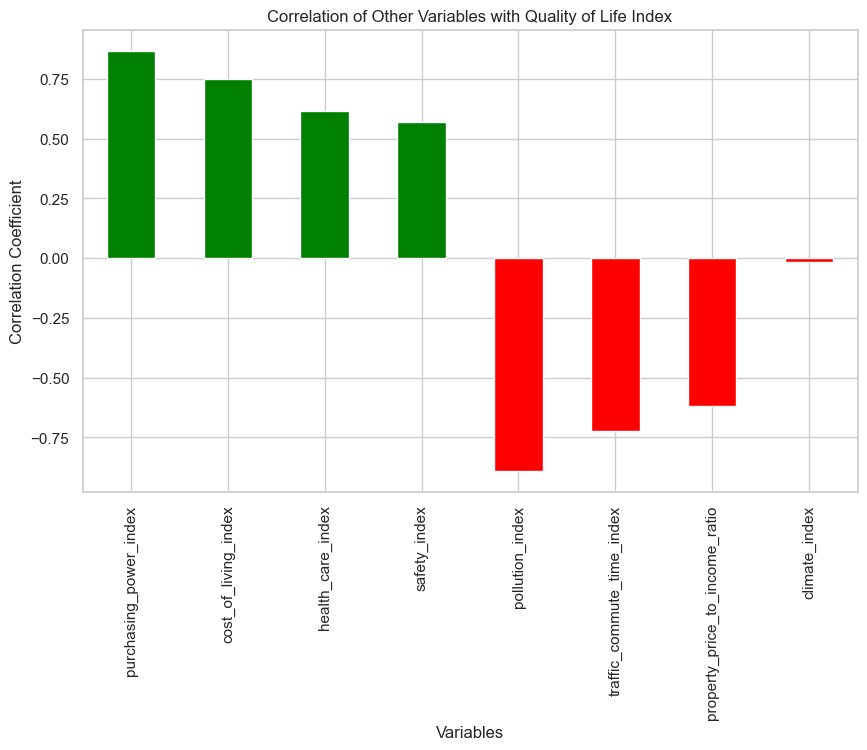

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

selected_columns = ['purchasing_power_index', 'cost_of_living_index', 'health_care_index',
                     'safety_index', 'pollution_index', 'traffic_commute_time_index',
                     'property_price_to_income_ratio', 'climate_index', 'quality_of_life_index']
correlation_matrix = df[selected_columns].corr()
quality_of_life_correlation = correlation_matrix['quality_of_life_index'].drop('quality_of_life_index')
colors = ['green' if corr > 0 else 'red' for corr in quality_of_life_correlation]

plt.figure(figsize=(10, 6))
quality_of_life_correlation.plot(kind='bar', color=colors)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variables')
plt.title('Correlation of Other Variables with Quality of Life Index')
plt.show()

For k=2, Silhouette Score: 0.4065
For k=3, Silhouette Score: 0.2730
For k=4, Silhouette Score: 0.2862
For k=5, Silhouette Score: 0.2197
For k=6, Silhouette Score: 0.2028
For k=7, Silhouette Score: 0.2196
For k=8, Silhouette Score: 0.2061
For k=9, Silhouette Score: 0.2122


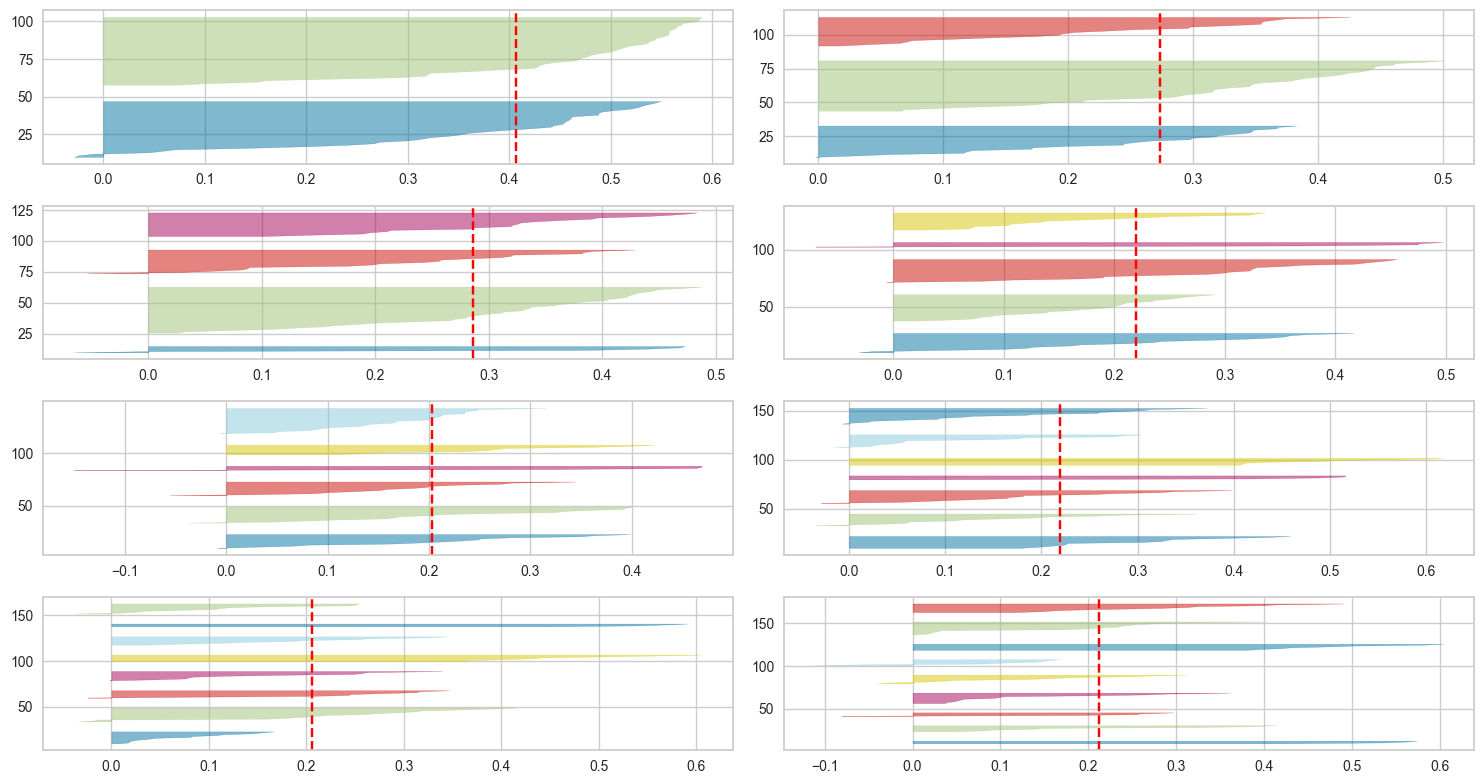

In [86]:
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import warnings 
warnings.filterwarnings('ignore')

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Select relevant variables
selected_variables = ['purchasing_power_index', 'cost_of_living_index', 'health_care_index',
                     'safety_index', 'pollution_index', 'traffic_commute_time_index',
                     'property_price_to_income_ratio', 'climate_index']

# Create a new DataFrame with only selected variables
data_for_clustering = df[selected_variables]

# Define a range of k values
k_values = range(2, 10)  # You can adjust this range based on your problem

# Visualize silhouette scores for different values of k
fig, ax = plt.subplots(math.floor(max(k_values) / 2), 2, figsize=(15, 8))

for i, k in enumerate(k_values, 1):
    # Initialize k-means for the current value of k
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_for_clustering)  # Fit the model and visualize the silhouette scores
    
    # Print the silhouette score
    silhouette_score = visualizer.silhouette_score_
    print(f'For k={k}, Silhouette Score: {silhouette_score:.4f}')

plt.tight_layout()
plt.show()

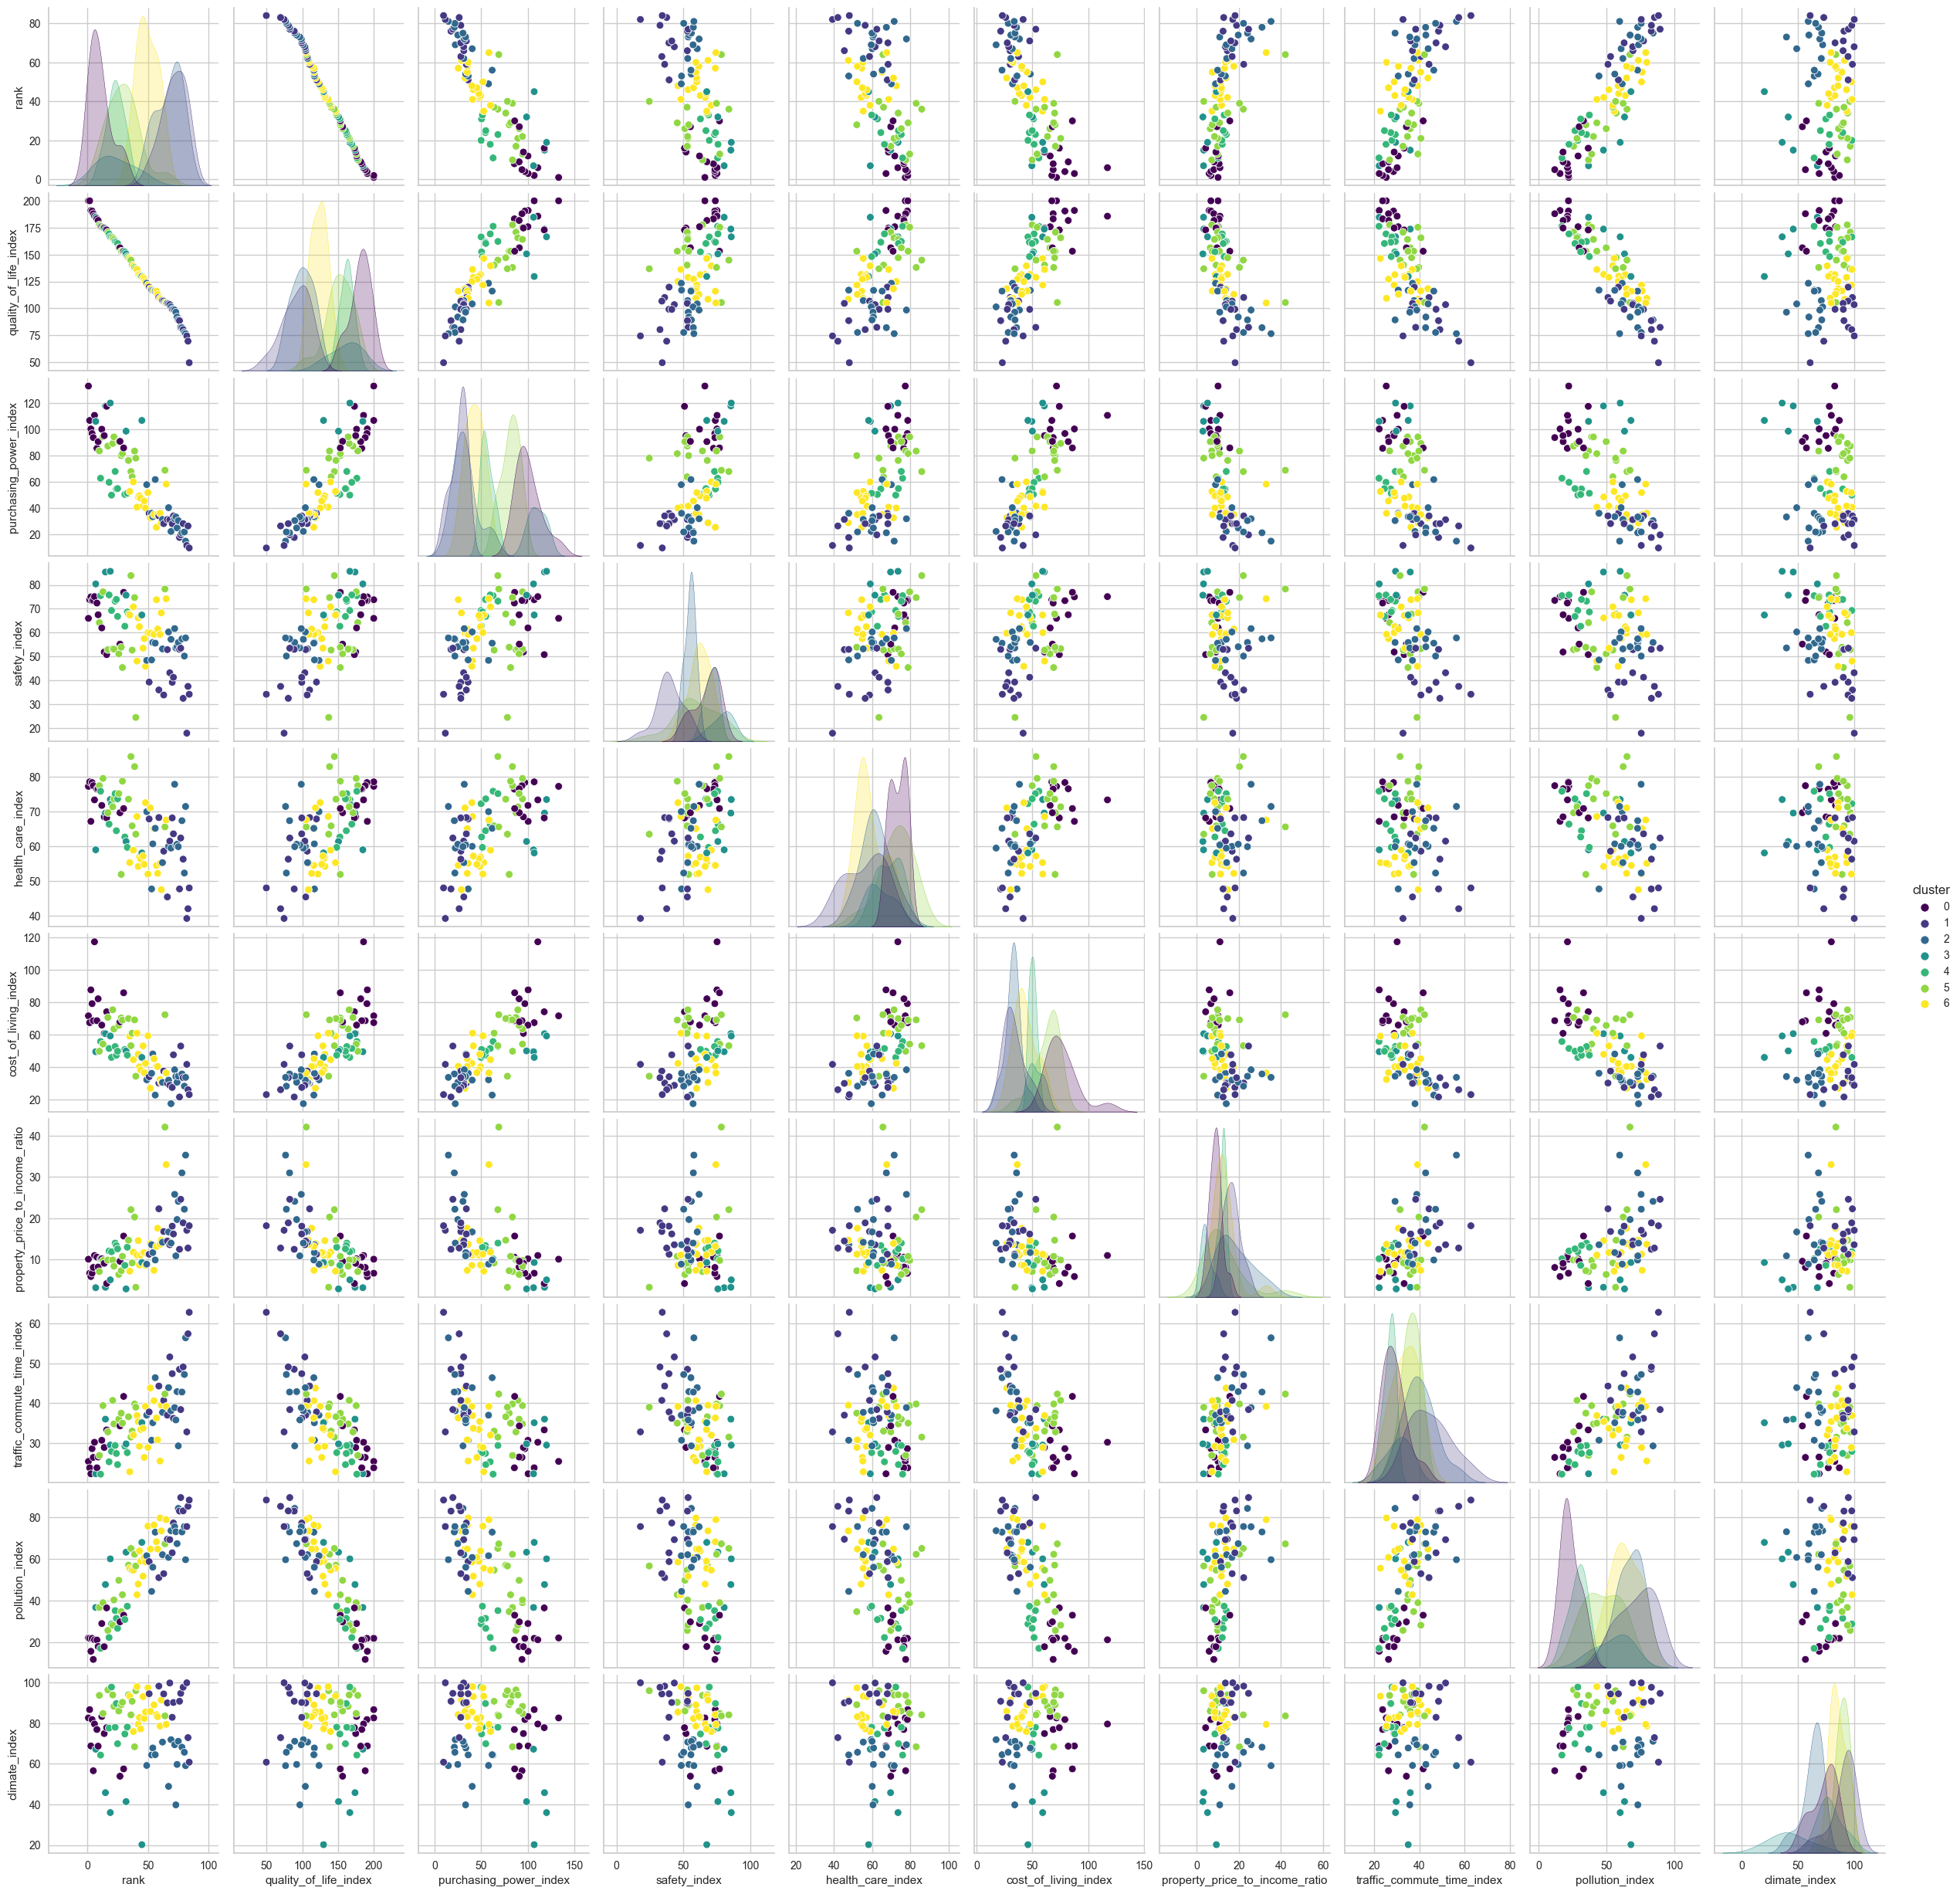

In [87]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Assuming 'df' is your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Select relevant variables
selected_variables = ['purchasing_power_index', 'cost_of_living_index', 'health_care_index',
                     'safety_index', 'pollution_index', 'traffic_commute_time_index',
                     'property_price_to_income_ratio', 'climate_index']

# Create a new DataFrame with only selected variables
data_for_clustering = df[selected_variables]

# Choose the number of clusters (you may adjust this based on your analysis)
k = 7

# Perform k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(data_for_clustering)

# Visualize the clustering (example with a pair plot)
sns.pairplot(df, hue='cluster', palette='viridis')
plt.show()

In [88]:
for variable in selected_variables:
    print(f"Statistics for variable: {variable}\n")
    cluster_statistics = df.groupby('cluster')[variable].describe()
    print(cluster_statistics)
    print("\n" + "=" * 40 + "\n")

Statistics for variable: purchasing_power_index

         count        mean        std   min      25%     50%      75%    max
cluster                                                                     
0         13.0  100.638462  13.602361  85.6   90.900   96.90  106.900  133.2
1         13.0   25.646154   8.622124   9.4   19.400   28.00   31.200   35.8
2         14.0   32.792857  13.339096  14.6   22.675   31.45   35.250   61.7
3          5.0  110.000000   8.941197  98.7  106.200  106.90  118.000  120.2
4          8.0   56.350000   6.504284  49.8   50.975   54.65   60.375   67.9
5         14.0   81.378571   9.679970  63.8   76.750   82.50   88.800   94.3
6         17.0   42.747059  10.032953  25.2   34.900   41.40   49.200   59.9


Statistics for variable: cost_of_living_index

         count       mean        std   min     25%    50%    75%    max
cluster                                                                
0         13.0  76.769231  14.646239  60.9  68.000  71.70  82.20 

In [89]:
print(df[['country', 'cluster']])

        country  cluster
0    Luxembourg        0
1   Netherlands        0
2       Iceland        0
3       Denmark        0
4       Finland        0
..          ...      ...
79         Iran        2
80    Sri Lanka        2
81    Venezuela        1
82   Bangladesh        1
83      Nigeria        1

[84 rows x 2 columns]


In [136]:
# Define cluster names
cluster_names = {
    0: "tier_1",
    1: "tier_5",
    2: "tier_4",
    3: "tier_2_betterCostPurchaseSafetyProperty",
    4: "tier_2_betterPollutionTraffic",
    5: "tier_2_betterHealthClimate",
    6: "tier_3"
}

# Map cluster labels to cluster names
df['cluster_name'] = df['cluster'].map(cluster_names)

# Display the DataFrame with the new 'cluster_name' column
print(df[['country', 'cluster', 'cluster_name']])

        country  cluster cluster_name
0    Luxembourg        0       tier_1
1   Netherlands        0       tier_1
2       Iceland        0       tier_1
3       Denmark        0       tier_1
4       Finland        0       tier_1
..          ...      ...          ...
79         Iran        2       tier_4
80    Sri Lanka        2       tier_4
81    Venezuela        1       tier_5
82   Bangladesh        1       tier_5
83      Nigeria        1       tier_5

[84 rows x 3 columns]


In [137]:
# Create separate DataFrames for each cluster
cluster_dataframes = {}
for cluster_label in range(k):
    cluster_dataframes[cluster_label] = df[df['cluster'] == cluster_label]

# Display each cluster's DataFrame
for cluster_label, cluster_df in cluster_dataframes.items():
    print(f"Cluster {cluster_label}:\n")
    print(cluster_df[['country', 'cluster', 'cluster_name']])
    print("\n" + "=" * 40 + "\n")

Cluster 0:

          country  cluster cluster_name
0      Luxembourg        0       tier_1
1     Netherlands        0       tier_1
2         Iceland        0       tier_1
3         Denmark        0       tier_1
4         Finland        0       tier_1
5     Switzerland        0       tier_1
7         Austria        0       tier_1
8          Norway        0       tier_1
11        Germany        0       tier_1
13         Sweden        0       tier_1
15  United States        0       tier_1
26         Canada        0       tier_1
29      Singapore        0       tier_1


Cluster 1:

       country  cluster cluster_name
50     Ecuador        1       tier_5
58   Argentina        1       tier_5
62      Brazil        1       tier_5
65     Morocco        1       tier_5
67       Kenya        1       tier_5
69    Colombia        1       tier_5
70       Chile        1       tier_5
75       Egypt        1       tier_5
76     Lebanon        1       tier_5
78        Peru        1       tier_5
81   Ve

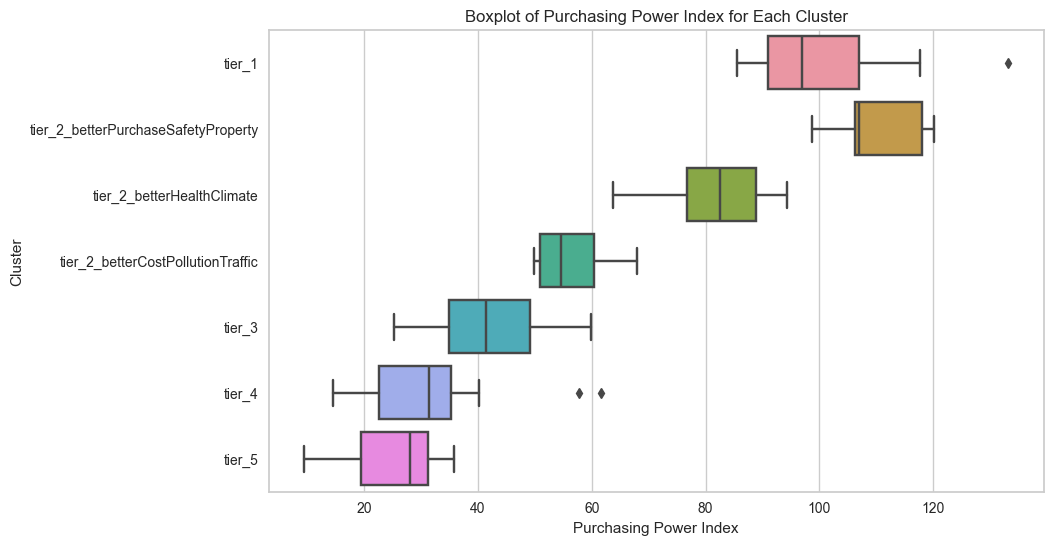

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Selecting relevant columns
selected_columns = ['cluster_name', 'purchasing_power_index']

# Creating a DataFrame with selected columns
data_for_boxplot = df[selected_columns]

# Setting the size of the plot
plt.figure(figsize=(10, 6))

# Creating a boxplot using seaborn
sns.boxplot(y='cluster_name', x='purchasing_power_index', data=data_for_boxplot)

# Adding labels and title
plt.ylabel('Cluster')
plt.xlabel('Purchasing Power Index')
plt.title('Boxplot of Purchasing Power Index for Each Cluster')

# Showing the plot
plt.show()

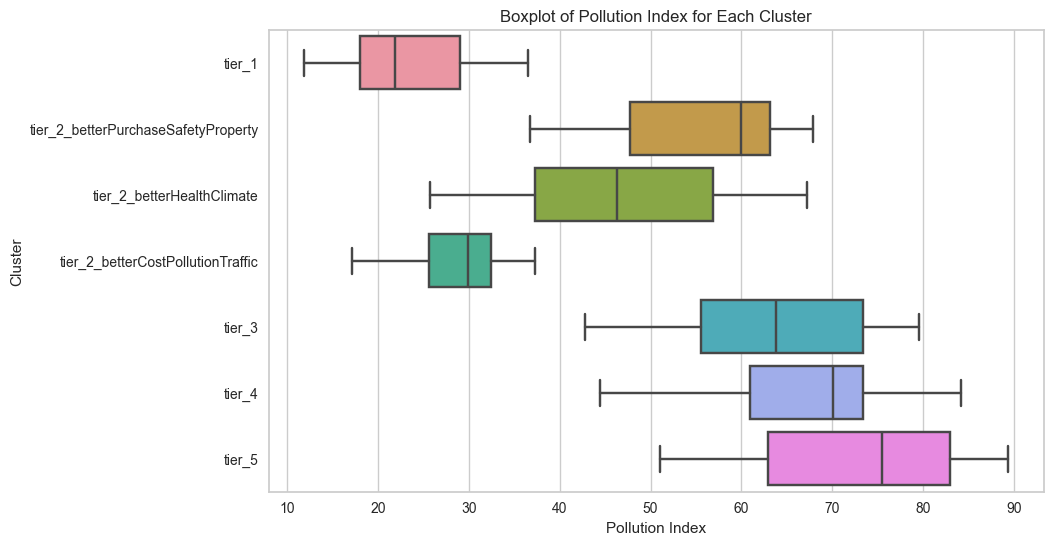

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Selecting relevant columns
selected_columns = ['cluster_name', 'pollution_index']

# Creating a DataFrame with selected columns
data_for_boxplot = df[selected_columns]

# Setting the size of the plot
plt.figure(figsize=(10, 6))

# Creating a boxplot using seaborn
sns.boxplot(y='cluster_name', x='pollution_index', data=data_for_boxplot)

# Adding labels and title
plt.ylabel('Cluster')
plt.xlabel('Pollution Index')
plt.title('Boxplot of Pollution Index for Each Cluster')

# Showing the plot
plt.show()

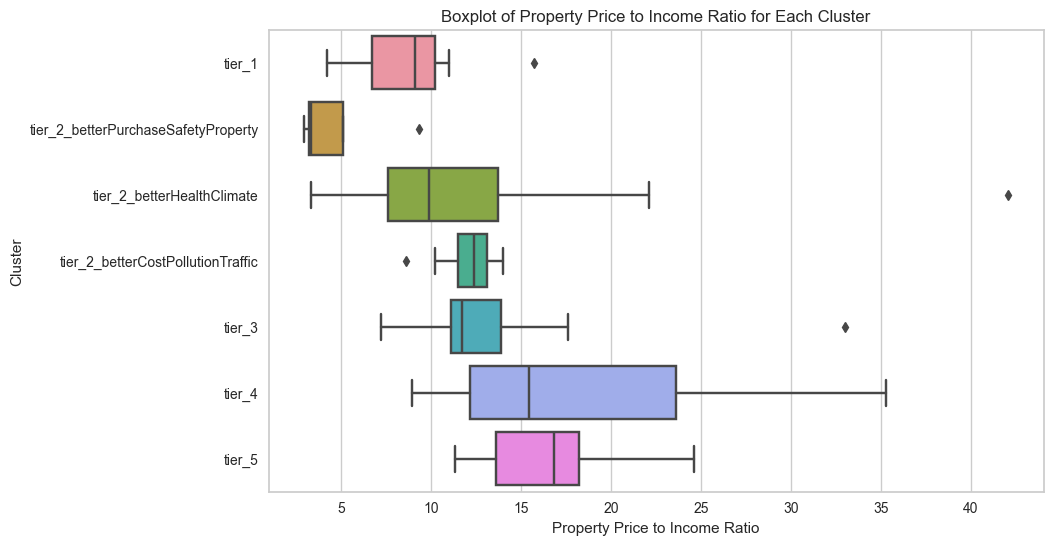

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Selecting relevant columns
selected_columns = ['cluster_name', 'property_price_to_income_ratio']

# Creating a DataFrame with selected columns
data_for_boxplot = df[selected_columns]

# Setting the size of the plot
plt.figure(figsize=(10, 6))

# Creating a boxplot using seaborn
sns.boxplot(y='cluster_name', x='property_price_to_income_ratio', data=data_for_boxplot)

# Adding labels and title
plt.ylabel('Cluster')
plt.xlabel('Property Price to Income Ratio')
plt.title('Boxplot of Property Price to Income Ratio for Each Cluster')

# Showing the plot
plt.show()

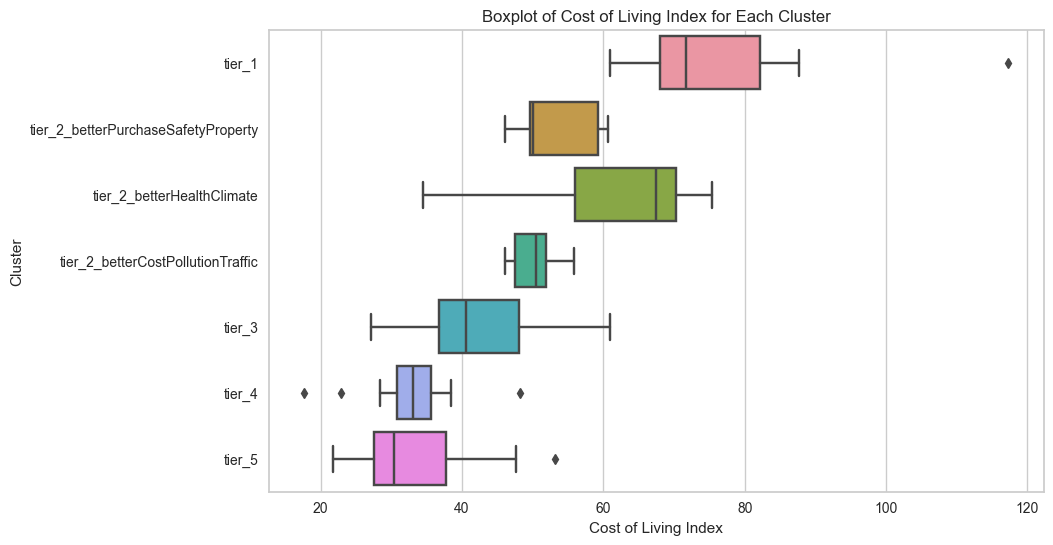

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Selecting relevant columns
selected_columns = ['cluster_name', 'cost_of_living_index']

# Creating a DataFrame with selected columns
data_for_boxplot = df[selected_columns]

# Setting the size of the plot
plt.figure(figsize=(10, 6))

# Creating a boxplot using seaborn
sns.boxplot(y='cluster_name', x='cost_of_living_index', data=data_for_boxplot)

# Adding labels and title
plt.ylabel('Cluster')
plt.xlabel('Cost of Living Index')
plt.title('Boxplot of Cost of Living Index for Each Cluster')

# Showing the plot
plt.show()

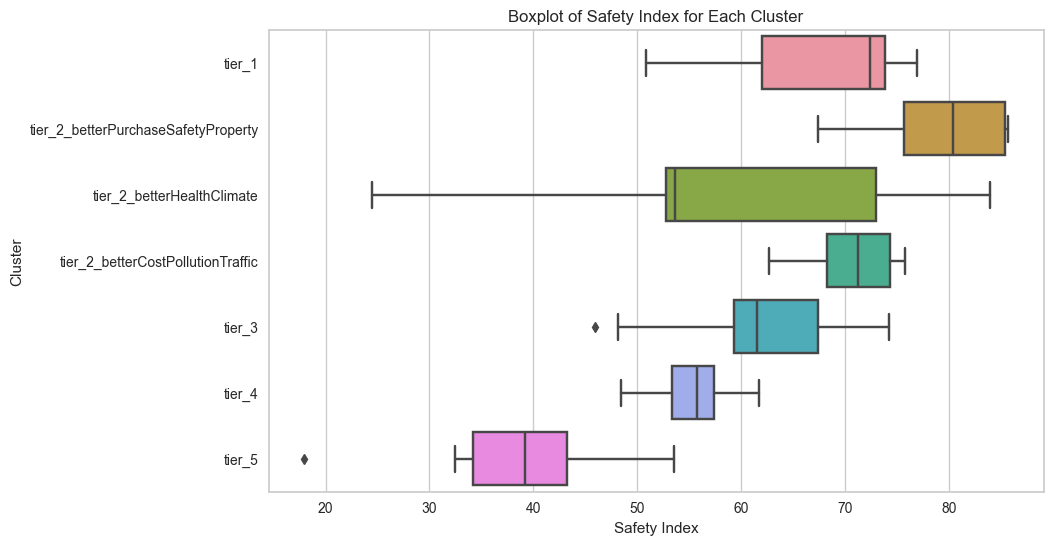

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Selecting relevant columns
selected_columns = ['cluster_name', 'safety_index']

# Creating a DataFrame with selected columns
data_for_boxplot = df[selected_columns]

# Setting the size of the plot
plt.figure(figsize=(10, 6))

# Creating a boxplot using seaborn
sns.boxplot(y='cluster_name', x='safety_index', data=data_for_boxplot)

# Adding labels and title
plt.ylabel('Cluster')
plt.xlabel('Safety Index')
plt.title('Boxplot of Safety Index for Each Cluster')

# Showing the plot
plt.show()

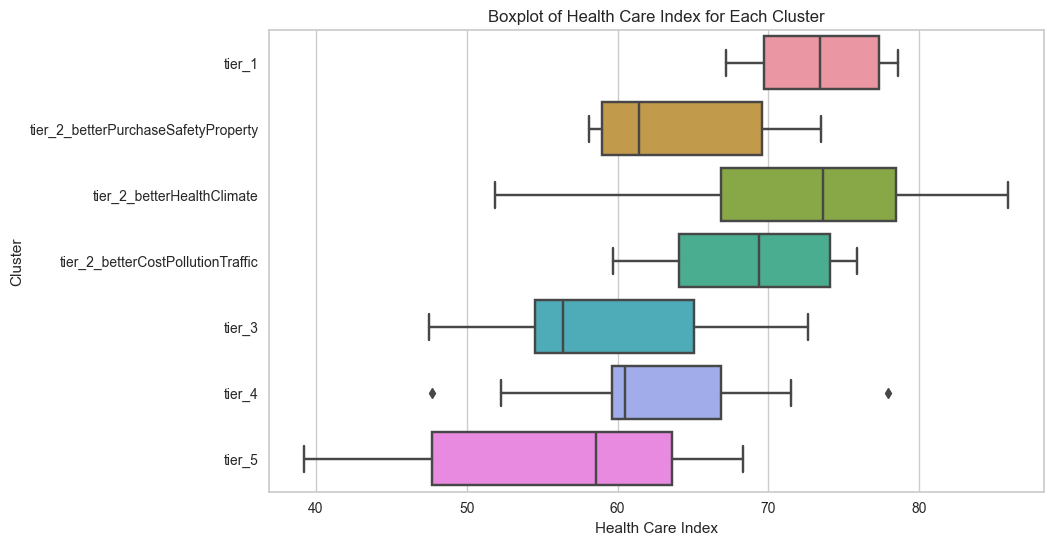

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Selecting relevant columns
selected_columns = ['cluster_name', 'health_care_index']

# Creating a DataFrame with selected columns
data_for_boxplot = df[selected_columns]

# Setting the size of the plot
plt.figure(figsize=(10, 6))

# Creating a boxplot using seaborn
sns.boxplot(y='cluster_name', x='health_care_index', data=data_for_boxplot)

# Adding labels and title
plt.ylabel('Cluster')
plt.xlabel('Health Care Index')
plt.title('Boxplot of Health Care Index for Each Cluster')

# Showing the plot
plt.show()

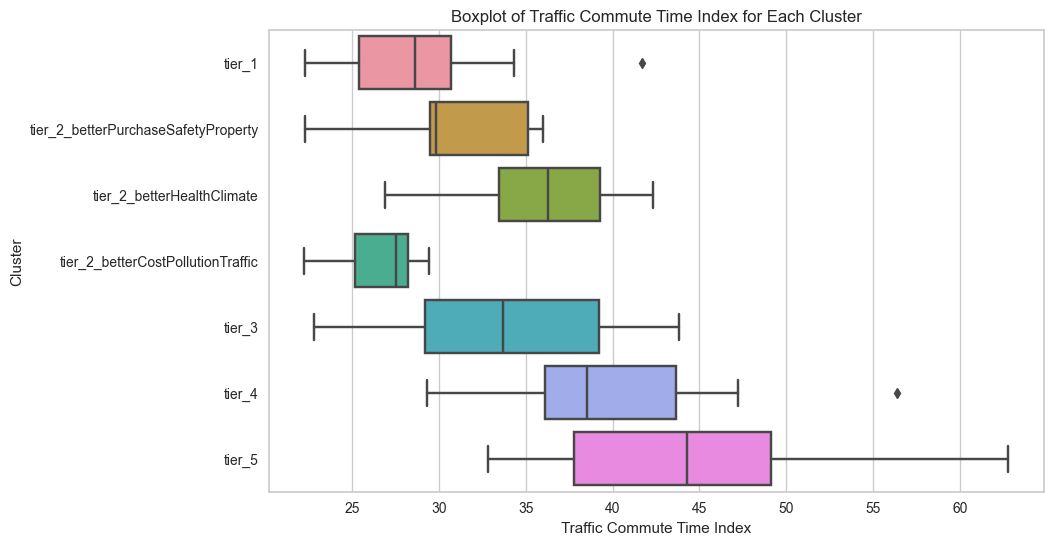

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Selecting relevant columns
selected_columns = ['cluster_name', 'traffic_commute_time_index']

# Creating a DataFrame with selected columns
data_for_boxplot = df[selected_columns]

# Setting the size of the plot
plt.figure(figsize=(10, 6))

# Creating a boxplot using seaborn
sns.boxplot(y='cluster_name', x='traffic_commute_time_index', data=data_for_boxplot)

# Adding labels and title
plt.ylabel('Cluster')
plt.xlabel('Traffic Commute Time Index')
plt.title('Boxplot of Traffic Commute Time Index for Each Cluster')

# Showing the plot
plt.show()

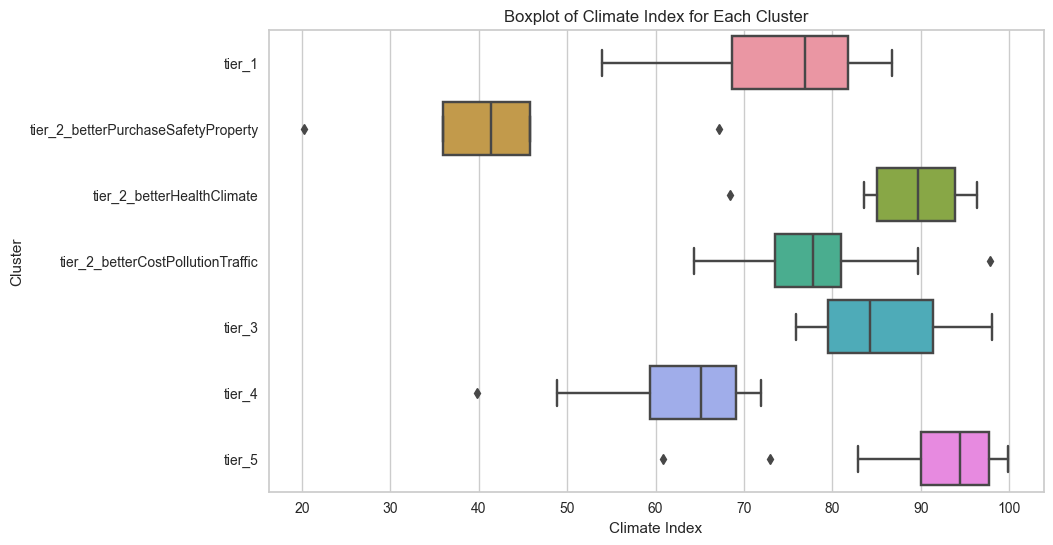

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Selecting relevant columns
selected_columns = ['cluster_name', 'climate_index']

# Creating a DataFrame with selected columns
data_for_boxplot = df[selected_columns]

# Setting the size of the plot
plt.figure(figsize=(10, 6))

# Creating a boxplot using seaborn
sns.boxplot(y='cluster_name', x='climate_index', data=data_for_boxplot)

# Adding labels and title
plt.ylabel('Cluster')
plt.xlabel('Climate Index')
plt.title('Boxplot of Climate Index for Each Cluster')

# Showing the plot
plt.show()

In [139]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual name of your DataFrame

# Selecting relevant columns
selected_columns = ['cluster_name', 'purchasing_power_index', 'pollution_index', 
                    'safety_index', 'health_care_index', 'cost_of_living_index', 
                    'property_price_to_income_ratio', 'traffic_commute_time_index', 'climate_index']

# Creating a DataFrame with selected columns
data_for_ranking = df[selected_columns]

# Grouping by 'cluster' and calculating the average for each factor
median_factors = data_for_ranking.groupby('cluster_name').median()

# Ranking the average factors for each cluster with specified criteria
ranking_criteria = {
    'purchasing_power_index': False,  # Rank descending
    'pollution_index': True,  # Rank ascending
    'safety_index': False,  # Rank descending
    'health_care_index': False,  # Rank descending
    'cost_of_living_index': True,  # Rank ascending
    'property_price_to_income_ratio': True,  # Rank ascending
    'traffic_commute_time_index': True,  # Rank ascending
    'climate_index': False  # Rank descending
}

# Applying the specified ranking criteria
df_ranked_factors = pd.DataFrame(index = median_factors.index)

for factor, ascending in ranking_criteria.items():
    rank_column = f'{factor}_rank'
    df_ranked_factors[rank_column] = median_factors[factor].rank(ascending=ascending).astype("int")

# Adding a column for the sum of the ranks
df_ranked_factors['sum_of_ranks'] = df_ranked_factors.sum(axis=1)
df_ranked_factors = df_ranked_factors.sort_values(by='sum_of_ranks')

# Displaying the resulting DataFrame
display(df_ranked_factors)

purchasing_power_index_rank  \
cluster_name                                                           
tier_1                                                             2   
tier_2_betterCostPurchaseSafetyProperty                            1   
tier_2_betterPollutionTraffic                                      4   
tier_2_betterHealthClimate                                         3   
tier_3                                                             5   
tier_4                                                             6   
tier_5                                                             7   

                                         pollution_index_rank  \
cluster_name                                                    
tier_1                                                      1   
tier_2_betterCostPurchaseSafetyProperty                     4   
tier_2_betterPollutionTraffic                               2   
tier_2_betterHealthClimate                                  3   
tier_3                                                      5   
tier_4                                                      6   
tier_5                                                      7   

                                         safety_index_rank  \
cluster_name                                                 
tier_1                                                   2   
tier_2_betterCostPurchaseSafetyProperty                  1   
tier_2_betterPollutionTraffic                            3   
tier_2_betterHealthClimate                               6   
tier_3                                                   4   
tier_4                                                   5   
tier_5                                                   7   

                                         health_care_index_rank  \
cluster_name                                                      
tier_1                                                        2   
tier_2_betterCostPurchaseSafetyProperty                       4   
tier_2_betterPollutionTraffic                                 3   
tier_2_betterHealthClimate                                    1   
tier_3                                                        7   
tier_4                                                        5   
tier_5                                                        6   

                                         cost_of_living_index_rank  \
cluster_name                                                         
tier_1                                                           7   
tier_2_betterCostPurchaseSafetyProperty                          4   
tier_2_betterPollutionTraffic                                    5   
tier_2_betterHealthClimate                                       6   
tier_3                                                           3   
tier_4                                                           2   
tier_5                                                           1   

                                         property_price_to_income_ratio_rank  \
cluster_name                                                                   
tier_1                                                                     2   
tier_2_betterCostPurchaseSafetyProperty                                    1   
tier_2_betterPollutionTraffic                                              5   
tier_2_betterHealthClimate                                                 3   
tier_3                                                                     4   
tier_4                                                                     6   
tier_5                                                                     7   

                                         traffic_commute_time_index_rank  \
cluster_name                                                               
tier_1                                                                 2   
tier_2_betterCostPurchaseSafetyProperty                        